# Build a model with the data provided
# 1. Data exploration insights – what did you find and what decision did you take?
# 2. Feature matrix - List of features selected with gain
# 3. Model evaluation - Gini and rank ordering 

# Project Name - Bank_Good_Credit
# Project ID - PM-PR-0015
# Category: Banking_Credit_Risk

# Business case:

# Attributes:

# Installing the Necessary Packages:

In [1]:
!pip install pymysql
!pip install mysql-connector

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import os
import mysql.connector
import pandas as pd

In [4]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                   user='dm_team1',
                                   password='DM!$Team&279@20!',
                                   database='project_banking',
                                   port='3306')

In [5]:
##Finding the number of rows present in the database
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


In [6]:
cust_Account=pd.read_sql_query('select * from Cust_Account',connection)

In [7]:
cust_Account

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


# Basic checks for cust_Account Table:

In [8]:
cust_Account.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,


In [9]:
cust_Account.tail()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,
186328,11-Jun-15,1611,25-May-15,6,1,29-Nov-05,,31-Dec-08,11-Jun-10,26000,...,,"""""""000000000000000000000000000XXXXXXXXXXXXXXX0...",,01-Dec-08,01-Oct-07,,,,,


In [10]:
cust_Account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dt_opened            186329 non-null  object
 1   customer_no          186329 non-null  object
 2   upload_dt            186329 non-null  object
 3   acct_type            186329 non-null  object
 4   owner_indic          186329 non-null  object
 5   opened_dt            186329 non-null  object
 6   last_paymt_dt        186329 non-null  object
 7   closed_dt            186329 non-null  object
 8   reporting_dt         186329 non-null  object
 9   high_credit_amt      186329 non-null  object
 10  cur_balance_amt      186329 non-null  object
 11  amt_past_due         186329 non-null  object
 12  paymenthistory1      186329 non-null  object
 13  paymenthistory2      186329 non-null  object
 14  paymt_str_dt         186329 non-null  object
 15  paymt_end_dt         186329 non-nu

In [11]:
# To show all columns.
pd.set_option('display.max_columns',None)
cust_Account.describe(include='all')

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
count,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329,186329
unique,197,23896,75,31,4,6246,4511,4840,1877,67555,56425,630,18311,11912,234,235,1380,1456,1476,3,18300
top,16-Nov-15,8516,21-Apr-15,10,1,13-Apr-12,,,31-Jul-15,,0,,"""""""0000000000000000000000000000000000000000000...",,01-Jul-15,01-Jan-15,,,,,
freq,4643,120,5128,100239,177287,514,25487,109075,12654,8875,89872,185453,44979,107824,16747,5640,137477,151047,161496,122436,145276


In [12]:
# Create a function for change "empty_values" to "null" values.
def change_null(df,col):
    df.loc[df[i]=='',i] = np.nan

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Use 'change_null' function for change "empty_values" to "null" values in table_1.
for i in cust_Account.columns :
    change_null(cust_Account,i)

In [15]:
# Seperate date_columns and change datatype to 'datetime64' .
date_col_1 = ['dt_opened','upload_dt','last_paymt_dt','closed_dt','reporting_dt','paymt_str_dt','paymt_end_dt','opened_dt']
for i in date_col_1:
    cust_Account[i]=cust_Account[i].astype('datetime64')

In [16]:
# Seperate numerical Columns and change datatype to 'float32'
num_col_1 = ['customer_no','acct_type','owner_indic','high_credit_amt','cur_balance_amt',
             'amt_past_due','creditlimit', 'cashlimit','paymentfrequency','actualpaymentamount']
for i in num_col_1:
    cust_Account[i]=cust_Account[i].astype('float32')

In [17]:
cust_Account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_opened            186329 non-null  datetime64[ns]
 1   customer_no          186329 non-null  float32       
 2   upload_dt            186329 non-null  datetime64[ns]
 3   acct_type            186329 non-null  float32       
 4   owner_indic          186329 non-null  float32       
 5   opened_dt            185874 non-null  datetime64[ns]
 6   last_paymt_dt        160842 non-null  datetime64[ns]
 7   closed_dt            77254 non-null   datetime64[ns]
 8   reporting_dt         186329 non-null  datetime64[ns]
 9   high_credit_amt      177454 non-null  float32       
 10  cur_balance_amt      186329 non-null  float32       
 11  amt_past_due         876 non-null     float32       
 12  paymenthistory1      186329 non-null  object        
 13  paymenthistory

In [18]:
# From "rateofinterest" columns find "empty" space & replace with same values. 
cust_Account.loc[cust_Account['rateofinterest']=='"9','rateofinterest'] = 9
cust_Account.loc[cust_Account['rateofinterest']=='"8','rateofinterest'] = 8
cust_Account.loc[cust_Account['rateofinterest']=='"7','rateofinterest'] = 7

In [19]:
# Change datatype of "rateofinterest" columns into "float32".
cust_Account.rateofinterest = cust_Account['rateofinterest'].astype('float32')

# Exploratory Data Analysis for cust_Account Table:

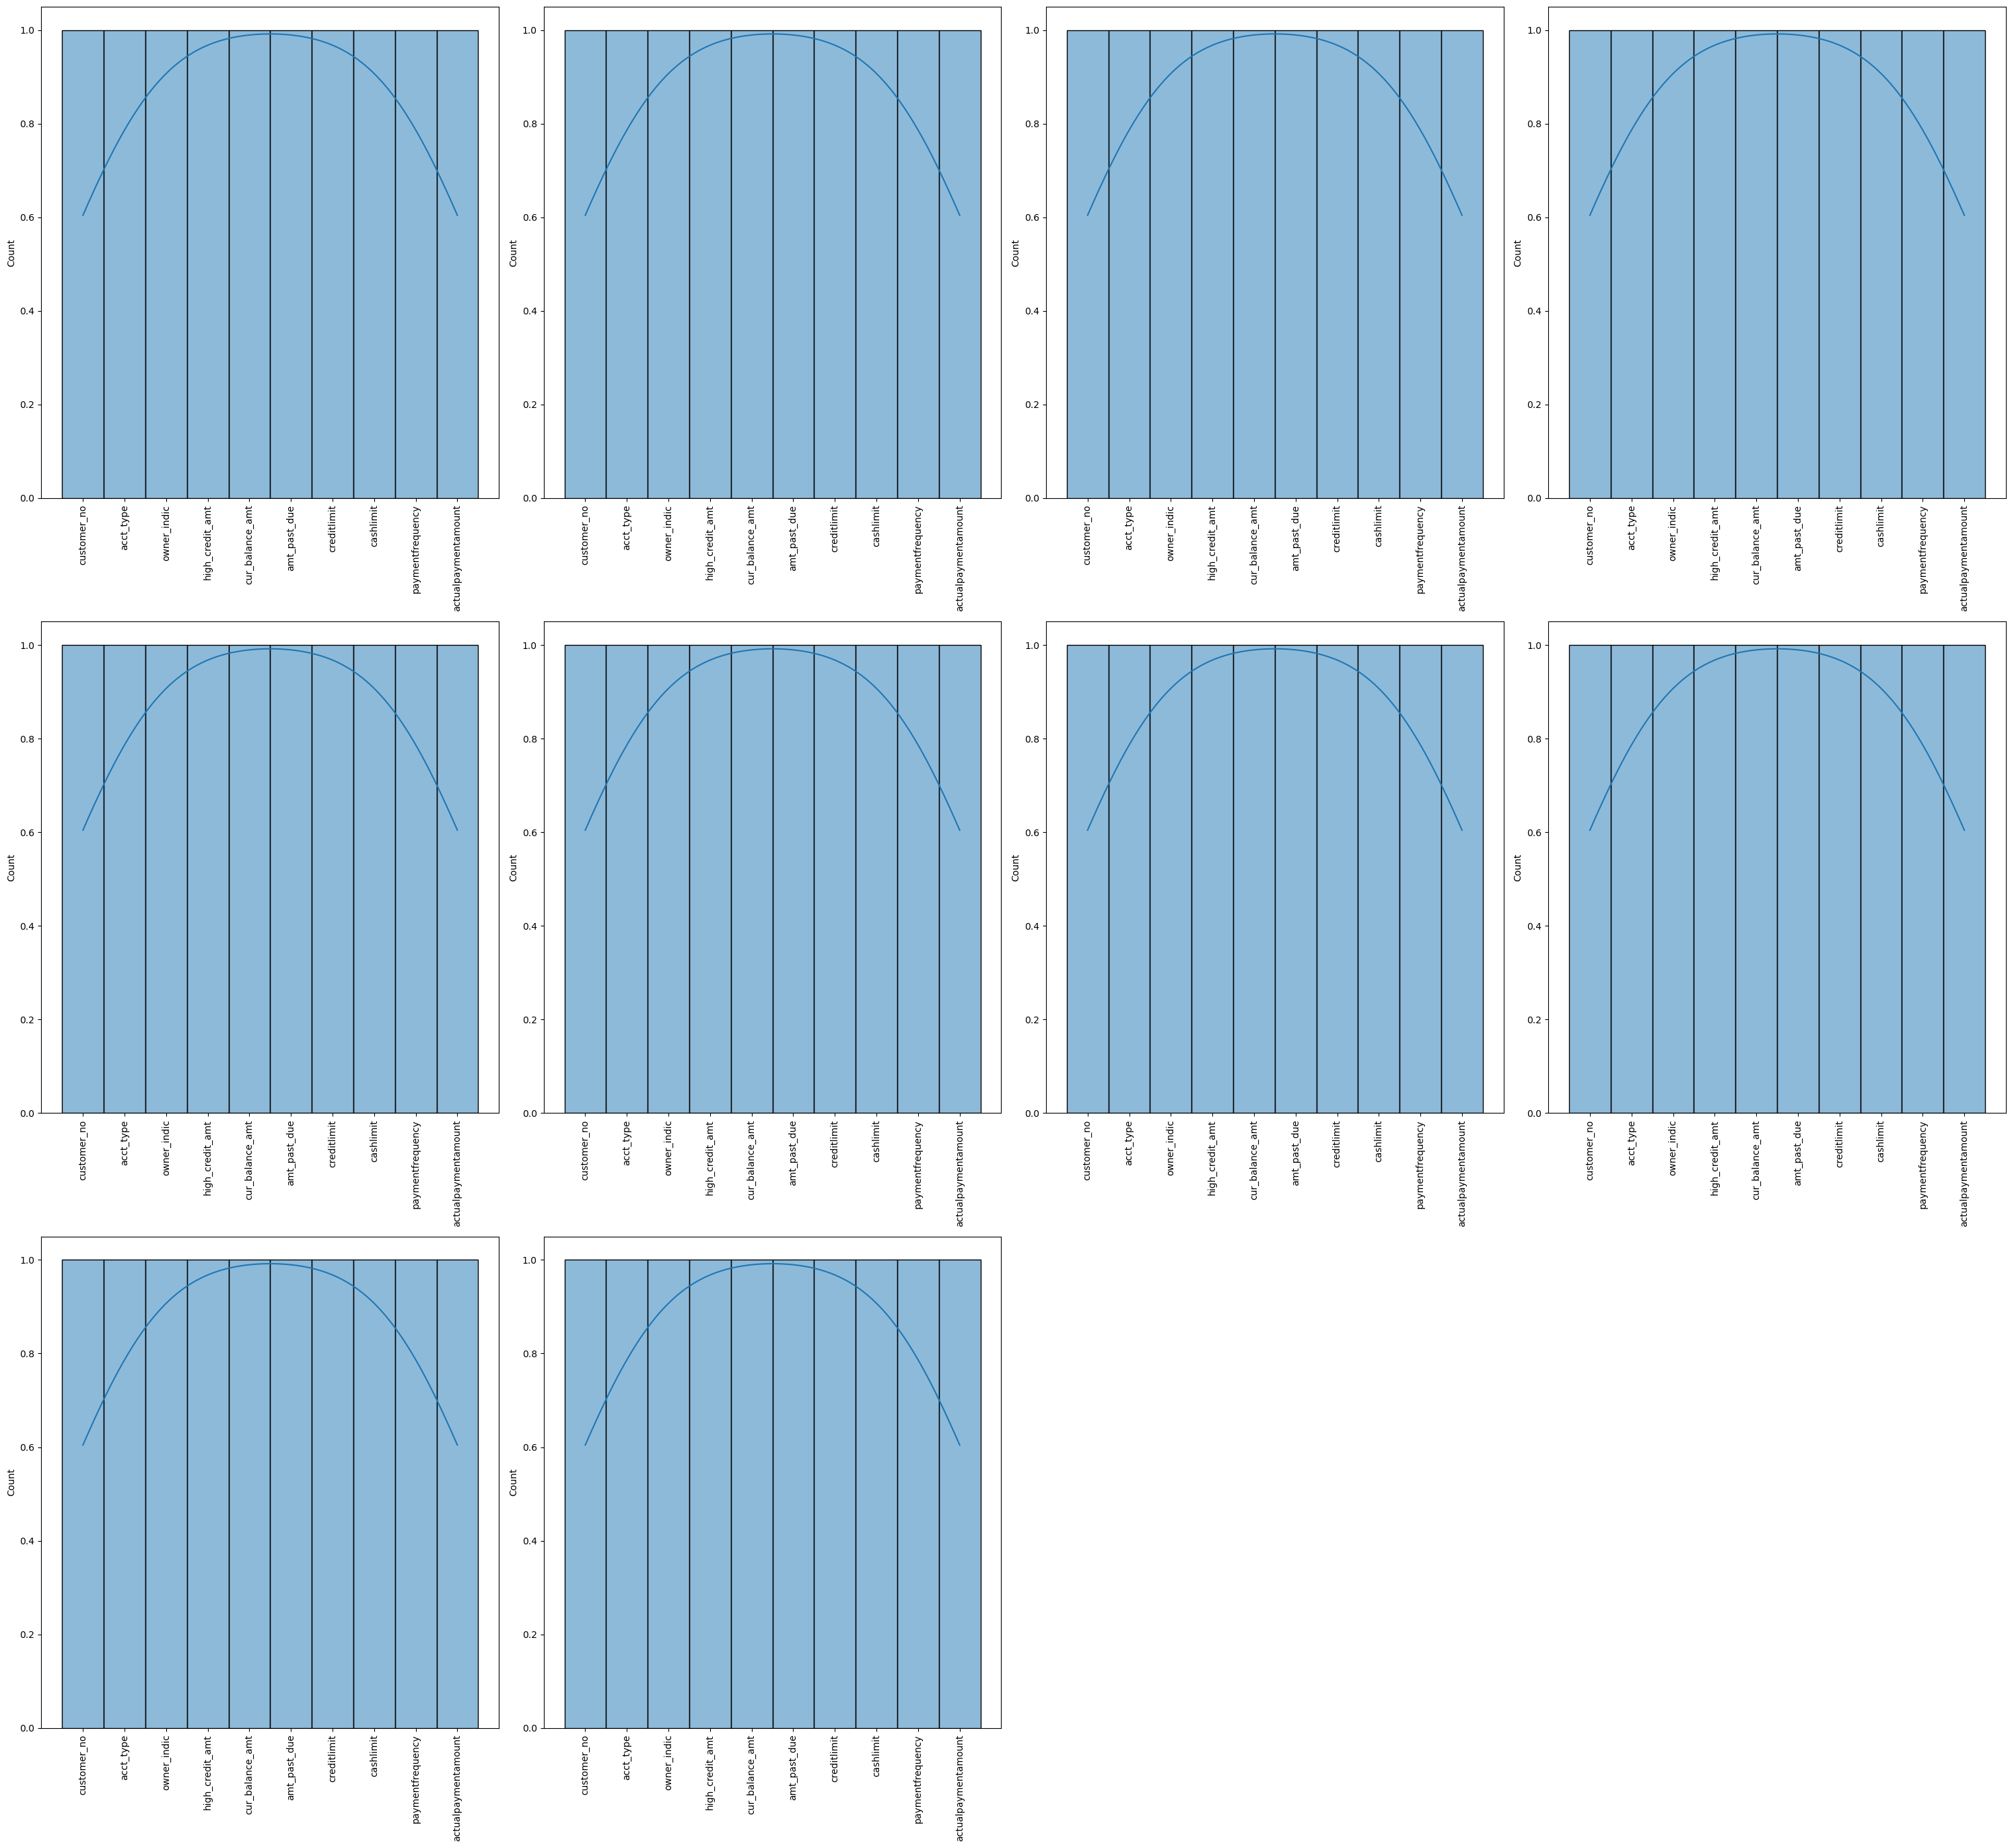

In [20]:
plt.figure(figsize=(30,35))
plotnumber=1
for column in num_col_1:
    ax=plt.subplot(4,4,plotnumber)
    sns.histplot(x=num_col_1,kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='customer_no', ylabel='Count'>

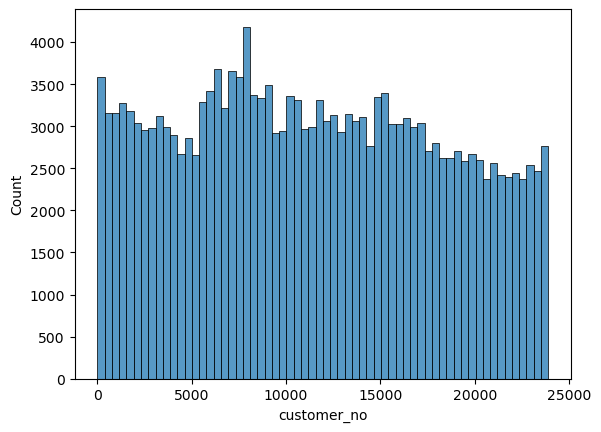

In [21]:
sns.histplot(x=cust_Account.customer_no)

<Axes: xlabel='opened_dt', ylabel='Count'>

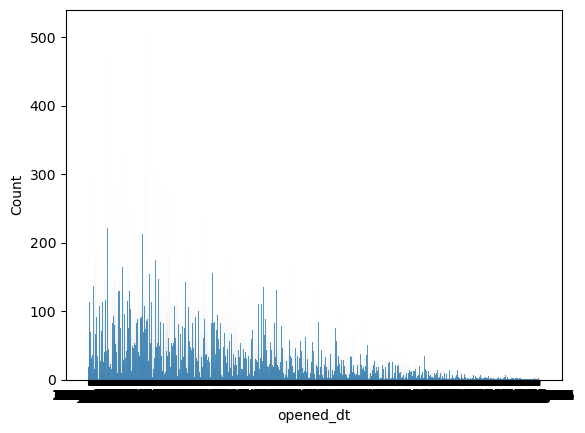

In [22]:
sns.histplot(x=cust_Account.opened_dt)

<Axes: xlabel='acct_type', ylabel='Count'>

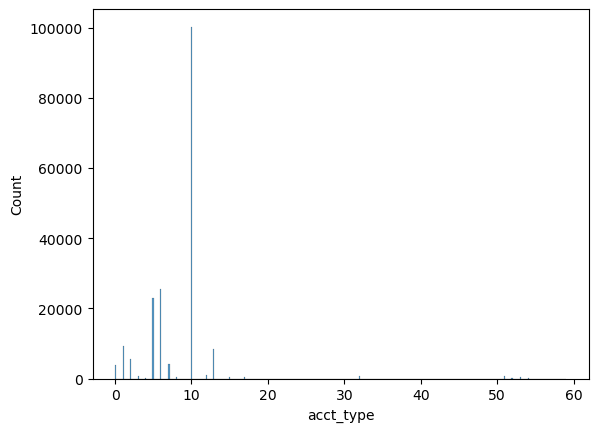

In [23]:
sns.histplot(x=cust_Account.acct_type)

<Axes: xlabel='high_credit_amt', ylabel='Count'>

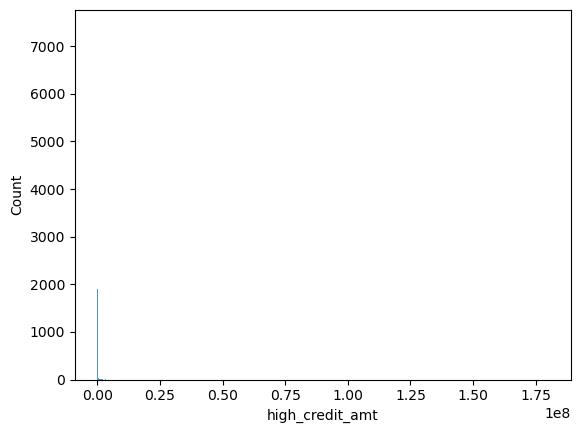

In [24]:
sns.histplot(x=cust_Account.high_credit_amt)

<Axes: xlabel='cur_balance_amt', ylabel='Count'>

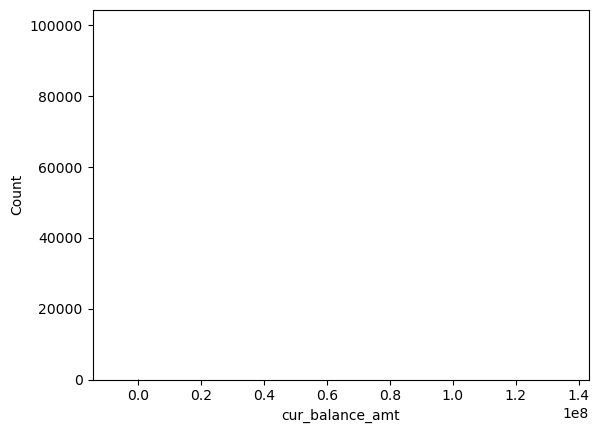

In [25]:
sns.histplot(x=cust_Account.cur_balance_amt)

In [22]:
import sweetviz as sv

In [24]:
# Univariate Analysis using sweetviz :
Report_1 = sv.analyze(cust_Account)
Report_1.show_html("cust_Account_Report.html")

                                             |                                             | [  0%]   00:00 ->…

Report cust_Account_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Preprocessing for the Table cust_Account: 

In [20]:
for i in cust_Account.columns:
    print(f"======= { i } ========\n")
    print(cust_Account[i].value_counts())

======= dt_opened ========

2015-11-16    4643
2015-12-21    2395
2015-08-18    2158
2015-10-13    2062
2015-10-26    2004
              ... 
2015-04-22      36
2015-04-18      18
2015-10-24       8
2015-04-16       2
2015-04-21       2
Name: dt_opened, Length: 197, dtype: int64
======= customer_no ========

8516.0     120
10076.0    112
6391.0      88
8872.0      77
8814.0      76
          ... 
20548.0      1
21356.0      1
6941.0       1
362.0        1
23434.0      1
Name: customer_no, Length: 23896, dtype: int64
======= upload_dt ========

2015-04-21    5128
2015-10-23    3591
2015-07-16    3512
2015-09-28    3507
2015-10-20    3486
              ... 
2015-12-17    1154
2015-12-24     334
2015-12-28     106
2015-12-31      53
2015-11-29      36
Name: upload_dt, Length: 75, dtype: int64
======= acct_type ========

10.0    100239
6.0      25664
5.0      22921
1.0       9427
13.0      8569
2.0       5639
7.0       4256
0.0       3944
12.0      1196
32.0       744
51.0       732
3.0   

In [21]:
cust_Account

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,2015-11-10,12265.0,2015-10-20,6.0,1.0,2013-06-09,2014-06-30,2014-07-05,2015-09-30,20900.0,0.0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,2015-09-01,2014-07-01,NaN,NaN,NaN,NaN,NaN
1,2015-11-10,12265.0,2015-10-20,10.0,1.0,2012-05-25,2015-09-06,NaT,2015-10-03,16201.0,10390.0,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",2015-10-01,2012-11-01,14000.0,1400.0,NaN,3.0,5603.0
2,2015-11-10,12265.0,2015-10-20,10.0,1.0,2012-03-22,2015-08-31,NaT,2015-09-30,41028.0,34420.0,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",2015-09-01,2012-10-01,NaN,NaN,NaN,NaN,NaN
3,2015-07-20,15606.0,2015-07-09,10.0,1.0,2006-01-13,NaT,2007-07-26,2009-01-31,93473.0,0.0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,2007-07-01,2006-02-01,NaN,NaN,NaN,NaN,NaN
4,2015-07-20,15606.0,2015-07-09,6.0,1.0,2015-01-18,2015-05-05,NaT,2015-05-31,20250.0,13500.0,NaN,"""""""000000000000000""""""",NaN,2015-05-01,2015-01-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,2015-06-11,1611.0,2015-05-25,10.0,1.0,2007-05-02,2015-04-21,NaT,2015-04-30,24228.0,24228.0,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",2015-04-01,2012-05-01,NaN,NaN,NaN,NaN,NaN
186325,2015-06-11,1611.0,2015-05-25,10.0,1.0,2007-04-11,2009-06-22,2010-04-02,2015-04-30,19584.0,0.0,NaN,"""""""000179146119089058029000XXX""""""",NaN,2010-04-01,2009-08-01,NaN,NaN,NaN,3.0,NaN
186326,2015-06-11,1611.0,2015-05-25,10.0,1.0,2006-11-20,NaT,2012-04-12,2013-12-31,50844.0,0.0,NaN,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",NaN,2012-04-01,2010-12-01,NaN,NaN,NaN,3.0,NaN
186327,2015-06-11,1611.0,2015-05-25,10.0,1.0,2006-10-17,NaT,2012-03-07,2015-04-15,35587.0,0.0,NaN,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",2012-03-01,2009-04-01,15000.0,6000.0,NaN,3.0,NaN


In [22]:
cust_Account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_opened            186329 non-null  datetime64[ns]
 1   customer_no          186329 non-null  float32       
 2   upload_dt            186329 non-null  datetime64[ns]
 3   acct_type            186329 non-null  float32       
 4   owner_indic          186329 non-null  float32       
 5   opened_dt            185874 non-null  datetime64[ns]
 6   last_paymt_dt        160842 non-null  datetime64[ns]
 7   closed_dt            77254 non-null   datetime64[ns]
 8   reporting_dt         186329 non-null  datetime64[ns]
 9   high_credit_amt      177454 non-null  float32       
 10  cur_balance_amt      186329 non-null  float32       
 11  amt_past_due         876 non-null     float32       
 12  paymenthistory1      186329 non-null  object        
 13  paymenthistory

In [23]:
data1=cust_Account[['owner_indic','amt_past_due','paymenthistory1','paymenthistory2','creditlimit',
              'cashlimit','rateofinterest','paymentfrequency','actualpaymentamount']]

In [24]:
cust_Account.drop(columns=data1,inplace=True,axis=1)

In [25]:
cust_Account

,dt_opened,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt
0,2015-11-10,12265.0,2015-10-20,6.0,2013-06-09,2014-06-30,2014-07-05,2015-09-30,20900.0,0.0,2015-09-01,2014-07-01
1,2015-11-10,12265.0,2015-10-20,10.0,2012-05-25,2015-09-06,NaT,2015-10-03,16201.0,10390.0,2015-10-01,2012-11-01
2,2015-11-10,12265.0,2015-10-20,10.0,2012-03-22,2015-08-31,NaT,2015-09-30,41028.0,34420.0,2015-09-01,2012-10-01
3,2015-07-20,15606.0,2015-07-09,10.0,2006-01-13,NaT,2007-07-26,2009-01-31,93473.0,0.0,2007-07-01,2006-02-01
4,2015-07-20,15606.0,2015-07-09,6.0,2015-01-18,2015-05-05,NaT,2015-05-31,20250.0,13500.0,2015-05-01,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
186324,2015-06-11,1611.0,2015-05-25,10.0,2007-05-02,2015-04-21,NaT,2015-04-30,24228.0,24228.0,2015-04-01,2012-05-01
186325,2015-06-11,1611.0,2015-05-25,10.0,2007-04-11,2009-06-22,2010-04-02,2015-04-30,19584.0,0.0,2010-04-01,2009-08-01
186326,2015-06-11,1611.0,2015-05-25,10.0,2006-11-20,NaT,2012-04-12,2013-12-31,50844.0,0.0,2012-04-01,2010-12-01
186327,2015-06-11,1611.0,2015-05-25,10.0,2006-10-17,NaT,2012-03-07,2015-04-15,35587.0,0.0,2012-03-01,2009-04-01


In [26]:
cust_Account.isnull().sum()

dt_opened               0
customer_no             0
upload_dt               0
acct_type               0
opened_dt             455
last_paymt_dt       25487
closed_dt          109075
reporting_dt            0
high_credit_amt      8875
cur_balance_amt         0
paymt_str_dt            1
paymt_end_dt            1
dtype: int64

In [27]:
cust_Account.drop('closed_dt',axis=1,inplace=True)
#dropping this column because it has missing values more than 60 %

In [28]:
cust_Account.loc[cust_Account["high_credit_amt"].isnull(),'high_credit_amt'] = cust_Account['high_credit_amt'].median()

In [29]:
cust_Account

,dt_opened,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt
0,2015-11-10,12265.0,2015-10-20,6.0,2013-06-09,2014-06-30,2015-09-30,20900.0,0.0,2015-09-01,2014-07-01
1,2015-11-10,12265.0,2015-10-20,10.0,2012-05-25,2015-09-06,2015-10-03,16201.0,10390.0,2015-10-01,2012-11-01
2,2015-11-10,12265.0,2015-10-20,10.0,2012-03-22,2015-08-31,2015-09-30,41028.0,34420.0,2015-09-01,2012-10-01
3,2015-07-20,15606.0,2015-07-09,10.0,2006-01-13,NaT,2009-01-31,93473.0,0.0,2007-07-01,2006-02-01
4,2015-07-20,15606.0,2015-07-09,6.0,2015-01-18,2015-05-05,2015-05-31,20250.0,13500.0,2015-05-01,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...
186324,2015-06-11,1611.0,2015-05-25,10.0,2007-05-02,2015-04-21,2015-04-30,24228.0,24228.0,2015-04-01,2012-05-01
186325,2015-06-11,1611.0,2015-05-25,10.0,2007-04-11,2009-06-22,2015-04-30,19584.0,0.0,2010-04-01,2009-08-01
186326,2015-06-11,1611.0,2015-05-25,10.0,2006-11-20,NaT,2013-12-31,50844.0,0.0,2012-04-01,2010-12-01
186327,2015-06-11,1611.0,2015-05-25,10.0,2006-10-17,NaT,2015-04-15,35587.0,0.0,2012-03-01,2009-04-01


In [30]:
cust_Account=cust_Account.dropna()

In [31]:
cust_Account.isnull().sum()

dt_opened          0
customer_no        0
upload_dt          0
acct_type          0
opened_dt          0
last_paymt_dt      0
reporting_dt       0
high_credit_amt    0
cur_balance_amt    0
paymt_str_dt       0
paymt_end_dt       0
dtype: int64

In [32]:
cust_Account

,dt_opened,customer_no,upload_dt,acct_type,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymt_str_dt,paymt_end_dt
0,2015-11-10,12265.0,2015-10-20,6.0,2013-06-09,2014-06-30,2015-09-30,20900.0,0.0,2015-09-01,2014-07-01
1,2015-11-10,12265.0,2015-10-20,10.0,2012-05-25,2015-09-06,2015-10-03,16201.0,10390.0,2015-10-01,2012-11-01
2,2015-11-10,12265.0,2015-10-20,10.0,2012-03-22,2015-08-31,2015-09-30,41028.0,34420.0,2015-09-01,2012-10-01
4,2015-07-20,15606.0,2015-07-09,6.0,2015-01-18,2015-05-05,2015-05-31,20250.0,13500.0,2015-05-01,2015-01-01
5,2015-07-20,15606.0,2015-07-09,6.0,2015-01-14,2015-05-02,2015-05-31,20000.0,8000.0,2015-05-01,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...
186321,2015-06-11,1611.0,2015-05-25,5.0,2008-04-29,2011-07-30,2011-07-31,130000.0,0.0,2011-07-01,2008-08-01
186322,2015-06-11,1611.0,2015-05-25,5.0,2007-10-08,2010-11-20,2010-11-30,75000.0,0.0,2010-11-01,2008-04-01
186323,2015-06-11,1611.0,2015-05-25,10.0,2007-05-30,2012-09-05,2014-02-28,29516.0,0.0,2012-09-01,2009-10-01
186324,2015-06-11,1611.0,2015-05-25,10.0,2007-05-02,2015-04-21,2015-04-30,24228.0,24228.0,2015-04-01,2012-05-01


In [33]:
import pandas as pd

# Assuming 'your_dataframe' is your DataFrame
# Replace it with the actual DataFrame you are working with

# List of columns with date values
date_columns = ['dt_opened', 'upload_dt', 'last_paymt_dt', 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt']

# Iterate through date columns
for col in date_columns:
    # Convert to string and create new columns for year, month, and day
    cust_Account[col] =cust_Account[col].astype(str)
    cust_Account[col + '_Year'] =cust_Account[col].str.split('-', expand=True)[0].astype(int)
    cust_Account[col + '_Month'] =cust_Account[col].str.split('-', expand=True)[1].astype(int)
    cust_Account[col + '_Day'] =cust_Account[col].str.split('-', expand=True)[2].astype(int)

# Drop the original columns if needed
cust_Account.drop(date_columns, axis=1, inplace=True)


In [34]:
cust_Account

,customer_no,acct_type,opened_dt,high_credit_amt,cur_balance_amt,dt_opened_Year,dt_opened_Month,dt_opened_Day,upload_dt_Year,upload_dt_Month,upload_dt_Day,last_paymt_dt_Year,last_paymt_dt_Month,last_paymt_dt_Day,reporting_dt_Year,reporting_dt_Month,reporting_dt_Day,paymt_str_dt_Year,paymt_str_dt_Month,paymt_str_dt_Day,paymt_end_dt_Year,paymt_end_dt_Month,paymt_end_dt_Day
0,12265.0,6.0,2013-06-09,20900.0,0.0,2015,11,10,2015,10,20,2014,6,30,2015,9,30,2015,9,1,2014,7,1
1,12265.0,10.0,2012-05-25,16201.0,10390.0,2015,11,10,2015,10,20,2015,9,6,2015,10,3,2015,10,1,2012,11,1
2,12265.0,10.0,2012-03-22,41028.0,34420.0,2015,11,10,2015,10,20,2015,8,31,2015,9,30,2015,9,1,2012,10,1
4,15606.0,6.0,2015-01-18,20250.0,13500.0,2015,7,20,2015,7,9,2015,5,5,2015,5,31,2015,5,1,2015,1,1
5,15606.0,6.0,2015-01-14,20000.0,8000.0,2015,7,20,2015,7,9,2015,5,2,2015,5,31,2015,5,1,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186321,1611.0,5.0,2008-04-29,130000.0,0.0,2015,6,11,2015,5,25,2011,7,30,2011,7,31,2011,7,1,2008,8,1
186322,1611.0,5.0,2007-10-08,75000.0,0.0,2015,6,11,2015,5,25,2010,11,20,2010,11,30,2010,11,1,2008,4,1
186323,1611.0,10.0,2007-05-30,29516.0,0.0,2015,6,11,2015,5,25,2012,9,5,2014,2,28,2012,9,1,2009,10,1
186324,1611.0,10.0,2007-05-02,24228.0,24228.0,2015,6,11,2015,5,25,2015,4,21,2015,4,30,2015,4,1,2012,5,1


In [35]:
import pandas as pd

# Assuming 'your_dataframe' is your DataFrame
# Replace it with the actual DataFrame you are working with

# List of columns with date values
date_columns = ['opened_dt']

# Iterate through date columns
for col in date_columns:
    # Convert to string and create new columns for year, month, and day
    cust_Account[col] =cust_Account[col].astype(str)
    cust_Account[col + '_Year'] =cust_Account[col].str.split('-', expand=True)[0].astype(int)
    cust_Account[col + '_Month'] =cust_Account[col].str.split('-', expand=True)[1].astype(int)
    cust_Account[col + '_Day'] =cust_Account[col].str.split('-', expand=True)[2].astype(int)

# Drop the original columns if needed
cust_Account.drop(date_columns, axis=1, inplace=True)


In [36]:
cust_Account

,customer_no,acct_type,high_credit_amt,cur_balance_amt,dt_opened_Year,dt_opened_Month,dt_opened_Day,upload_dt_Year,upload_dt_Month,upload_dt_Day,last_paymt_dt_Year,last_paymt_dt_Month,last_paymt_dt_Day,reporting_dt_Year,reporting_dt_Month,reporting_dt_Day,paymt_str_dt_Year,paymt_str_dt_Month,paymt_str_dt_Day,paymt_end_dt_Year,paymt_end_dt_Month,paymt_end_dt_Day,opened_dt_Year,opened_dt_Month,opened_dt_Day
0,12265.0,6.0,20900.0,0.0,2015,11,10,2015,10,20,2014,6,30,2015,9,30,2015,9,1,2014,7,1,2013,6,9
1,12265.0,10.0,16201.0,10390.0,2015,11,10,2015,10,20,2015,9,6,2015,10,3,2015,10,1,2012,11,1,2012,5,25
2,12265.0,10.0,41028.0,34420.0,2015,11,10,2015,10,20,2015,8,31,2015,9,30,2015,9,1,2012,10,1,2012,3,22
4,15606.0,6.0,20250.0,13500.0,2015,7,20,2015,7,9,2015,5,5,2015,5,31,2015,5,1,2015,1,1,2015,1,18
5,15606.0,6.0,20000.0,8000.0,2015,7,20,2015,7,9,2015,5,2,2015,5,31,2015,5,1,2015,1,1,2015,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186321,1611.0,5.0,130000.0,0.0,2015,6,11,2015,5,25,2011,7,30,2011,7,31,2011,7,1,2008,8,1,2008,4,29
186322,1611.0,5.0,75000.0,0.0,2015,6,11,2015,5,25,2010,11,20,2010,11,30,2010,11,1,2008,4,1,2007,10,8
186323,1611.0,10.0,29516.0,0.0,2015,6,11,2015,5,25,2012,9,5,2014,2,28,2012,9,1,2009,10,1,2007,5,30
186324,1611.0,10.0,24228.0,24228.0,2015,6,11,2015,5,25,2015,4,21,2015,4,30,2015,4,1,2012,5,1,2007,5,2


# Now the data is cleaned fully and also the Date time type values are also changed 

# Importing the table Cust_Demographics:

In [37]:
cust_Demographics=pd.read_sql_query('select * from Cust_Demographics',connection)
cust_Demographics

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

# Basic Checks:

In [38]:
cust_Demographics.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [39]:
cust_Demographics.tail()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card Setup,14,68000,,,,Y,PM1,,,CD01,D066,,,1,CPOPSXXXXX,08-Nov-86,99111XXXXX,Y,@GMAIL.COM,2,0,Graduate,New Delhi,110033,1986,0,Paren,Y,1,1,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015,1,3,0,Gurgaon,122016,@ACCRETIVEHEALTH.COM,PAN Card,CPOPSXXXXX,,,Y,HDFC Bank,52000,01-Sep-14,17-Jun-16,1,10,,N,Y,N,,Y,1986-0,10,157,110033,0,1,1,0-0,13,R,,,0000-00-00,0,99111XXXXX,1,N,0
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740,3,Card Setup,14,158000,,,,Y,PD1,PD3,12,SA40,G011,,,1,AVZPGXXXXX,24-Nov-82,93100XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110095,2010,0,Self,Y,2,25000,,,,0,0,0,0,New Delhi,110095,,PAN Card,AVZPGXXXXX,,,Y,Citibank N.A.,65000,01-Apr-14,17-Jun-16,2,10,,N,Y,N,,Y,2010-0,10,157,110095,0,2,25000,03-May,10,R,,,0000-00-00,0,93100XXXXX,1,N,0
23895,04-Dec-15,23896,06-Nov-15,Titanium Deligh,06-Nov-15,688,1,Card Setup,14,106000,,,,Y,TD1,,0,SA03,AS33,,,1,AJIPBXXXXX,15-Aug-83,97178XXXXX,N,@GMAIL.COM,1,0,Graduate,Ghaziabad,201005,2005,0,Paren,Y,2,1,,,,0,0,0,0,Ghaziabad,201005,,PAN Card,AJIPBXXXXX,,,Y,State Bank of India,106000,01-Feb-15,17-Jun-16,1,33,,N,Y,N,,Y,2005-0,33,41,201005,0,2,1,Aug-00,33,R,,,0000-00-00,0,97178XXXXX,1,N,0


In [40]:
cust_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

In [41]:
cust_Demographics.describe()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
count,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896,23896
unique,197,23896,297,8,282,263,4,2,2,485,20,20,8,3,17,15,3,365,523,303,13,3,10610,8463,3251,3,722,3,12,11,63,965,53,14,6,3,4,4334,10,12,5664,19,14,13,13,71,937,4473,6,11250,57,19,3,11,660,181,2,5,13,3,3,3,3,9,3,492,28,425,3013,3,4,4334,134,14,3,3,4,63,6,3124,4,3,2
top,16-Nov-15,1,19-Oct-15,Platinum Maxima,,,3,Card Setup,14,35000,,,,Y,PM1,,12,SA03,AS19,,,1,AXMPKXXXXX,01-Jan-85,99999XXXXX,N,@GMAIL.COM,1,0,Graduate,New Delhi,110059,2010,0,Self,Y,1,1,Private Ltd. Co.,Banking/Financial Services,,0,0,0,0,New Delhi,201301,,PAN Card,XXXXX,,,Y,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2010-0,10,157,110059,0,1,1,0-0,10,R,,,0000-00-00,0,XXXXX,1,N,0
freq,699,1,180,9056,2836,2836,14593,23881,23881,797,22635,22635,23845,22611,8853,13004,10892,9331,1374,22869,23878,22701,16,33,194,21528,15595,18295,15503,14610,12539,1097,1839,21315,10833,19478,18214,8392,8677,13187,5682,5667,6344,5944,23181,9760,2320,13713,22796,94,18399,23792,12565,11422,11807,11610,23881,22693,12539,21503,23425,22611,23563,23887,23876,1670,10257,10257,944,19478,18214,8392,18235,9760,15617,20951,23879,23820,23817,2149,22958,23876,22892


# Data Preprocessing for cust_Demographics table:

In [42]:
cust_Demographics.isnull().sum()

dt_opened      0
customer_no    0
entry_time     0
feature_1      0
feature_2      0
              ..
feature_76     0
feature_77     0
feature_78     0
feature_79     0
Bad_label      0
Length: 83, dtype: int64

This table does not contain any null values

In [43]:
cust_Demographics.duplicated().sum()

0

There are no duplicated values present in this table 

In [44]:
import pandas as pd
# Replace it with the actual DataFrame you are working with

# Iterate through columns
for column in cust_Demographics.columns:
    unique_values = cust_Demographics[column].unique()
    
    # Print or process unique values for each column
    print(f"Unique values for column {column}: {unique_values}")


Unique values for column dt_opened: ['18-Apr-15' '21-Apr-15' '22-Apr-15' '25-Apr-15' '06-May-15' '12-May-15'
 '22-May-15' '28-May-15' '30-May-15' '01-Jun-15' '04-Jun-15' '05-Jun-15'
 '19-Jun-15' '30-Jun-15' '02-Jul-15' '06-Jul-15' '22-Jul-15' '27-Jul-15'
 '29-Jul-15' '31-Jul-15' '05-Aug-15' '07-Aug-15' '11-Aug-15' '17-Jul-15'
 '22-Aug-15' '26-Aug-15' '28-Aug-15' '29-Aug-15' '09-Sep-15' '10-Sep-15'
 '14-Sep-15' '15-Sep-15' '19-Sep-15' '24-Sep-15' '05-Oct-15' '06-Oct-15'
 '09-Oct-15' '29-Oct-15' '30-Oct-15' '04-Nov-15' '05-Nov-15' '15-Jul-15'
 '27-Nov-15' '15-Dec-15' '17-Dec-15' '30-Dec-15' '17-Nov-15' '20-Oct-15'
 '21-Oct-15' '26-Oct-15' '28-Oct-15' '03-Nov-15' '10-Nov-15' '12-Nov-15'
 '21-Nov-15' '26-Nov-15' '30-Nov-15' '01-Dec-15' '21-Dec-15' '22-Dec-15'
 '24-Dec-15' '09-Dec-15' '16-Apr-15' '23-Apr-15' '24-Apr-15' '27-Apr-15'
 '28-Apr-15' '29-Apr-15' '30-Apr-15' '01-May-15' '02-May-15' '05-May-15'
 '07-May-15' '08-May-15' '11-May-15' '13-May-15' '14-May-15' '15-May-15'
 '16-May-15' '1

# Removal of unwanted columns:

In [45]:
cust_Demographics.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0


In [46]:
data2=cust_Demographics[['entry_time','feature_2','feature_4','feature_5','feature_6','feature_10','feature_15',
                        'feature_20','feature_21','feature_18','feature_22','feature_24','feature_45','feature_47','feature_49',
                        'feature_53','feature_54','feature_61','feature_63','feature_70','feature_75','feature_77']]

In [47]:
cust_Demographics.drop(columns=data2,axis=1,inplace=True)

In [48]:
cust_Demographics

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,18-Apr-15,1,Insignia,650,500000,,,Y,IS1,,0,4284,4284,1,N,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,PAN Card,The Ratnakar Bank Ltd.,Y,State Bank of India,0,1,21,,Y,Y,N,Y,21,15,400610,0,2,90000,21,R,,,0,1,N,0
1,21-Apr-15,2,Insignia,760,1200000,,,Y,IS1,,0,B001,4077,1,N,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,17,,Y,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
2,22-Apr-15,3,Insignia,774,700000,,,Y,IS1,,0,B001,4077,2,N,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,,N,,0,3,17,,N,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
3,25-Apr-15,4,Insignia,770,500000,,,Y,IS1,,0,5107,5107,1,N,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,PAN Card,The Ratnakar Bank Ltd.,Y,HDFC Bank,0,1,21,,Y,Y,N,Y,21,16,411001,0,2,100000,21,R,,,1,1,N,0
4,06-May-15,5,Insignia,,500000,,,Y,IS1,,0,D016,4564,1,N,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,13,,Y,Y,N,Y,13,3,122009,0,2,300000,13,R,,,0,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,Platinum Deligh,704,119000,,,Y,PD1,PD3,12,MA01,,1,N,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,PAN Card,,Y,State Bank of India,99000,1,10,Y,N,Y,N,Y,10,157,110045,0,1,33000,13,R,Y,,0,1,N,0
23892,17-Dec-15,23893,Platinum Deligh,,35000,,,Y,PD1,PD3,12,AS33,,1,N,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,PAN Card,,N,,0,1,10,N,N,Y,N,Y,33,102,282001,1,1,1,10,O,Y,,0,1,N,0
23893,04-Nov-15,23894,Platinum Maxima,748,68000,,,Y,PM1,,,D066,,1,Y,2,0,Graduate,New Delhi,110033,1986,0,Paren,Y,1,1,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015,1,3,0,Gurgaon,122016,PAN Card,,Y,HDFC Bank,52000,1,10,,N,Y,N,Y,10,157,110033,0,1,1,13,R,,,0,1,N,0
23894,03-Nov-15,23895,Platinum Deligh,740,158000,,,Y,PD1,PD3,12,G011,,1,N,1,0,Graduate,New Delhi,110095,2010,0,Self,Y,2,25000,,,,0,0,0,0,New Delhi,110095,PAN Card,,Y,Citibank N.A.,65000,2,10,,N,Y,N,Y,10,157,110095,0,2,25000,10,R,,,0,1,N,0


# Conversion of Categorical to numerical columns:

In [49]:
cust_Demographics.head(4)

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,18-Apr-15,1,Insignia,650,500000,,,Y,IS1,,0,4284,4284,1,N,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,PAN Card,The Ratnakar Bank Ltd.,Y,State Bank of India,0,1,21,,Y,Y,N,Y,21,15,400610,0,2,90000,21,R,,,0,1,N,0
1,21-Apr-15,2,Insignia,760,1200000,,,Y,IS1,,0,B001,4077,1,N,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,17,,Y,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
2,22-Apr-15,3,Insignia,774,700000,,,Y,IS1,,0,B001,4077,2,N,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,,N,,0,3,17,,N,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
3,25-Apr-15,4,Insignia,770,500000,,,Y,IS1,,0,5107,5107,1,N,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,PAN Card,The Ratnakar Bank Ltd.,Y,HDFC Bank,0,1,21,,Y,Y,N,Y,21,16,411001,0,2,100000,21,R,,,1,1,N,0


In [50]:
cat_col=cust_Demographics[['feature_1','feature_8','feature_9','feature_11','feature_12','feature_13','feature_16','feature_19',
                          'feature_23','feature_26','feature_28','feature_32','feature_33','feature_34','feature_36','feature_37',
                          'feature_38','feature_43','feature_46','feature_48','feature_50','feature_51','feature_57','feature_58','feature_59',
                          'feature_60','feature_62','feature_67','feature_72','feature_73','feature_74','feature_78','feature_79','Bad_label']]
num_col=cust_Demographics[['customer_no','feature_3','feature_7','feature_14','feature_17','feature_27','feature_29','feature_30','feature_31',
                          'feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52','feature_55','feature_56',
                          'feature_64','feature_65','feature_66','feature_68','feature_69','feature_71','feature_76']]

In [51]:
date_col_2 = ['dt_opened']
for i in date_col_2:
    cust_Demographics[i]=cust_Demographics[i].astype('datetime64')

In [52]:
cust_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt_opened    23896 non-null  datetime64[ns]
 1   customer_no  23896 non-null  object        
 2   feature_1    23896 non-null  object        
 3   feature_3    23896 non-null  object        
 4   feature_7    23896 non-null  object        
 5   feature_8    23896 non-null  object        
 6   feature_9    23896 non-null  object        
 7   feature_11   23896 non-null  object        
 8   feature_12   23896 non-null  object        
 9   feature_13   23896 non-null  object        
 10  feature_14   23896 non-null  object        
 11  feature_16   23896 non-null  object        
 12  feature_17   23896 non-null  object        
 13  feature_19   23896 non-null  object        
 14  feature_23   23896 non-null  object        
 15  feature_25   23896 non-null  object        
 16  feat

Here the dt_opened is column is now changed into a datatype of datetime64

# Exploratory Data Analysis:

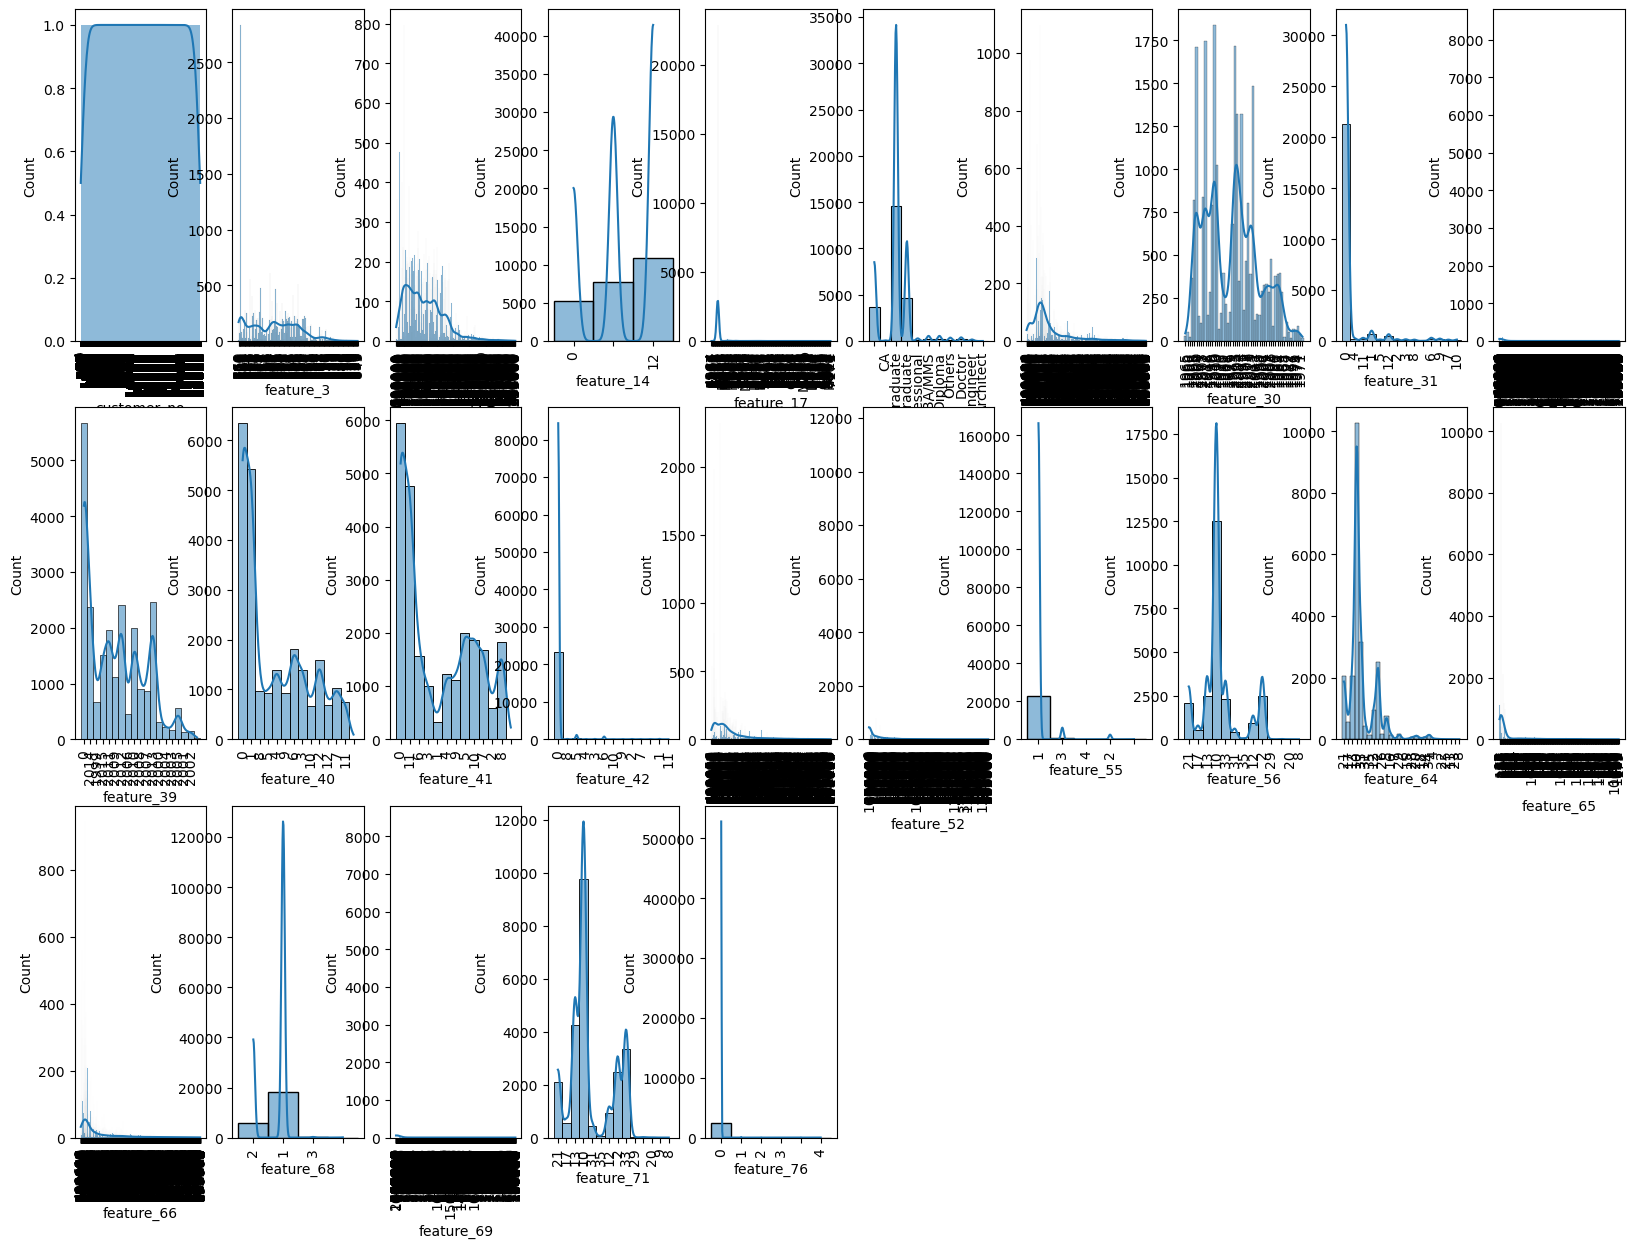

In [53]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in num_col:
    ax=plt.subplot(5,10,plotnumber)
    sns.histplot(x=num_col[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

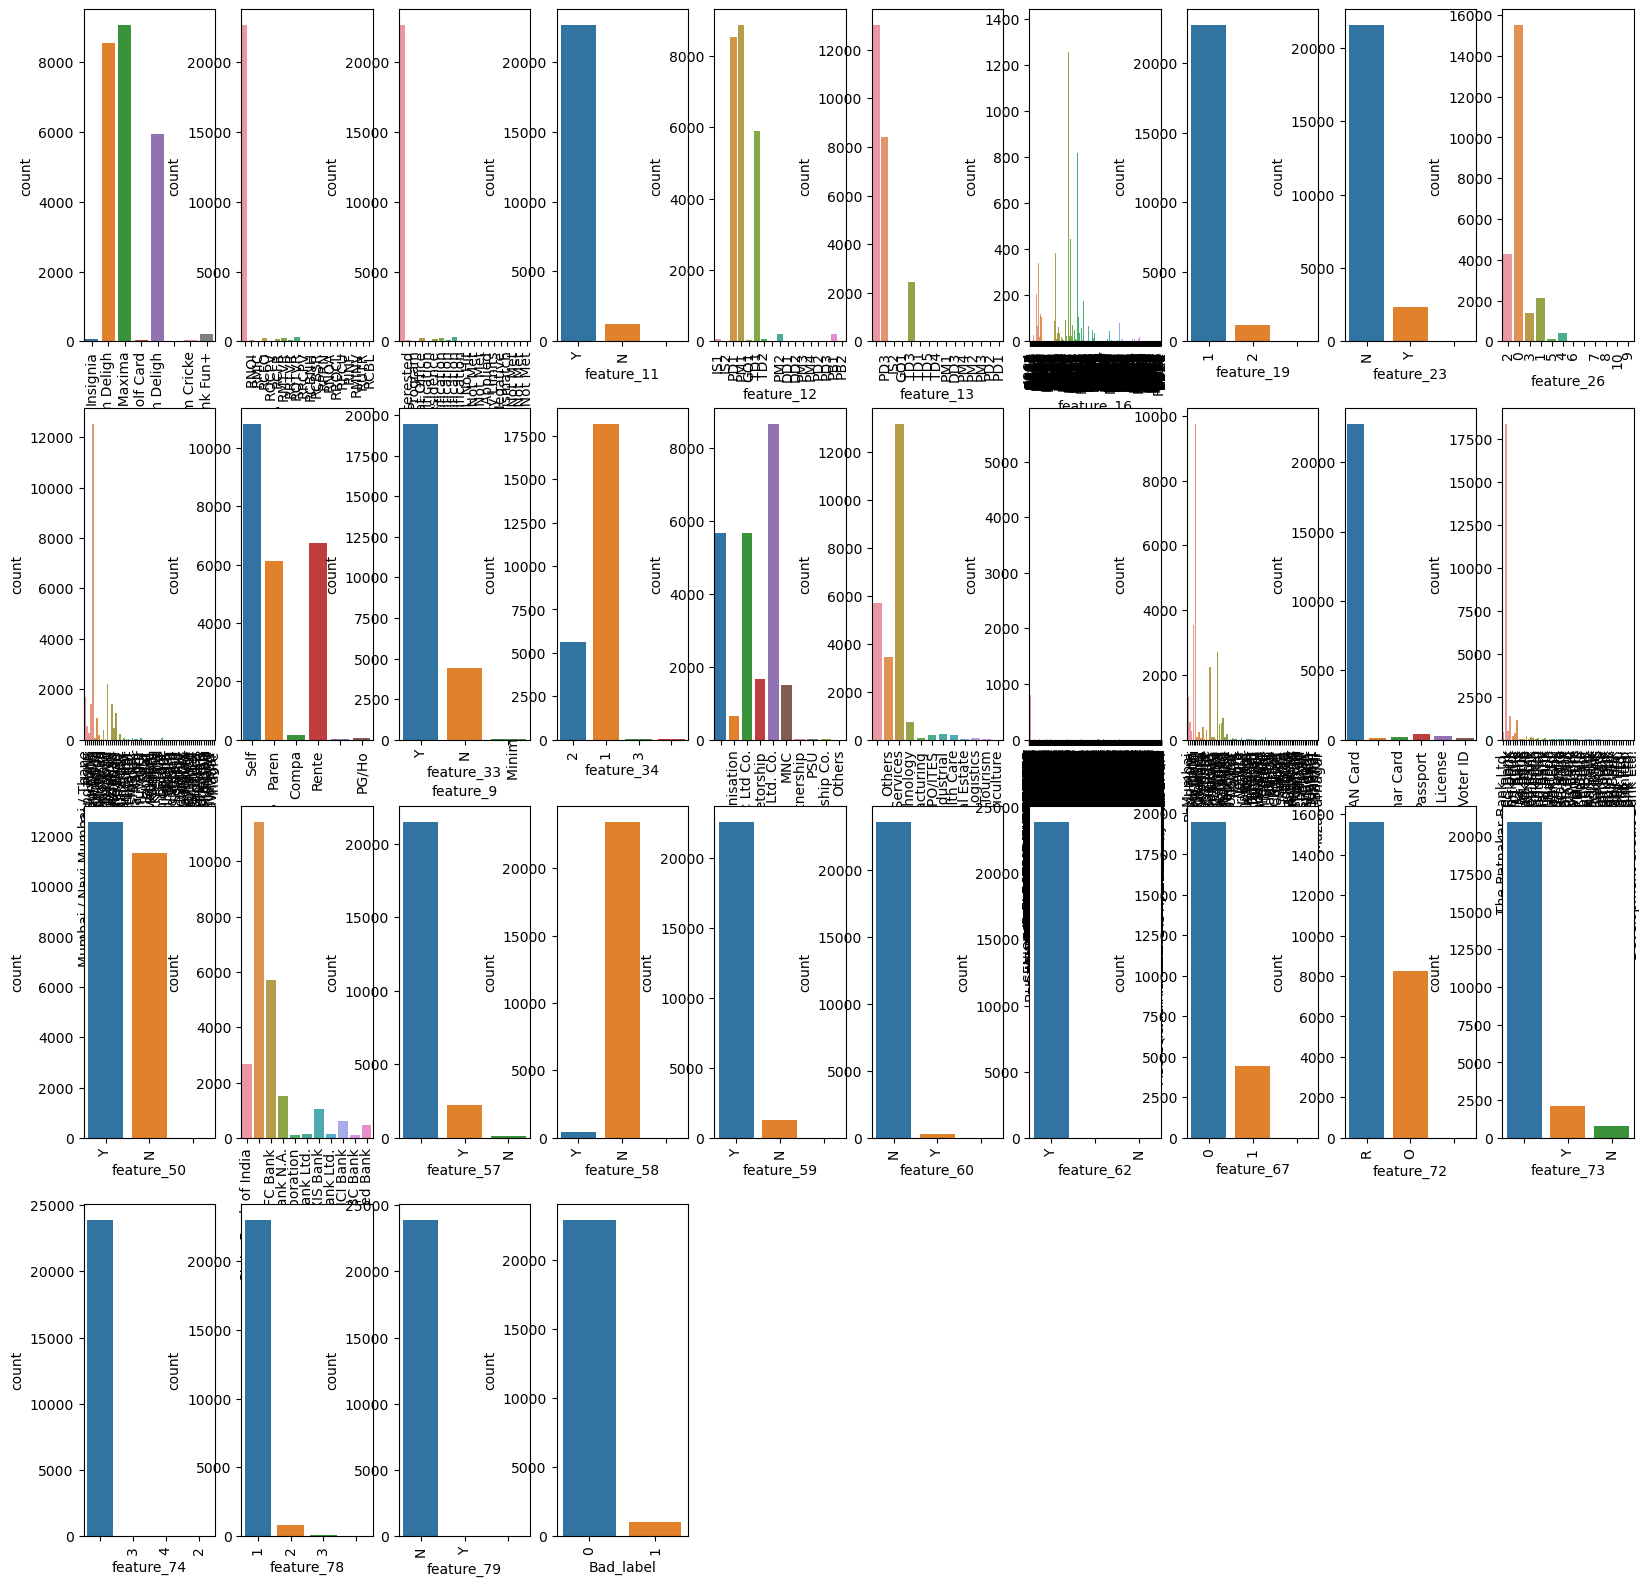

In [60]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in cat_col:
    ax=plt.subplot(5,10,plotnumber)
    sns.countplot(x=cat_col[column])
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

In [53]:
cust_Demographics

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,2015-04-18,1,Insignia,650,500000,,,Y,IS1,,0,4284,4284,1,N,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,PAN Card,The Ratnakar Bank Ltd.,Y,State Bank of India,0,1,21,,Y,Y,N,Y,21,15,400610,0,2,90000,21,R,,,0,1,N,0
1,2015-04-21,2,Insignia,760,1200000,,,Y,IS1,,0,B001,4077,1,N,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,17,,Y,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
2,2015-04-22,3,Insignia,774,700000,,,Y,IS1,,0,B001,4077,2,N,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,PAN Card,,N,,0,3,17,,N,Y,N,Y,17,12,560042,0,2,1,17,R,,,0,1,N,0
3,2015-04-25,4,Insignia,770,500000,,,Y,IS1,,0,5107,5107,1,N,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,PAN Card,The Ratnakar Bank Ltd.,Y,HDFC Bank,0,1,21,,Y,Y,N,Y,21,16,411001,0,2,100000,21,R,,,1,1,N,0
4,2015-05-06,5,Insignia,,500000,,,Y,IS1,,0,D016,4564,1,N,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,PAN Card,The Ratnakar Bank Ltd.,N,,0,1,13,,Y,Y,N,Y,13,3,122009,0,2,300000,13,R,,,0,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,2015-12-31,23892,Platinum Deligh,704,119000,,,Y,PD1,PD3,12,MA01,,1,N,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,PAN Card,,Y,State Bank of India,99000,1,10,Y,N,Y,N,Y,10,157,110045,0,1,33000,13,R,Y,,0,1,N,0
23892,2015-12-17,23893,Platinum Deligh,,35000,,,Y,PD1,PD3,12,AS33,,1,N,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,PAN Card,,N,,0,1,10,N,N,Y,N,Y,33,102,282001,1,1,1,10,O,Y,,0,1,N,0
23893,2015-11-04,23894,Platinum Maxima,748,68000,,,Y,PM1,,,D066,,1,Y,2,0,Graduate,New Delhi,110033,1986,0,Paren,Y,1,1,Private Ltd. Co.,Health Care,SENIOR ANALYST,2015,1,3,0,Gurgaon,122016,PAN Card,,Y,HDFC Bank,52000,1,10,,N,Y,N,Y,10,157,110033,0,1,1,13,R,,,0,1,N,0
23894,2015-11-03,23895,Platinum Deligh,740,158000,,,Y,PD1,PD3,12,G011,,1,N,1,0,Graduate,New Delhi,110095,2010,0,Self,Y,2,25000,,,,0,0,0,0,New Delhi,110095,PAN Card,,Y,Citibank N.A.,65000,2,10,,N,Y,N,Y,10,157,110095,0,2,25000,10,R,,,0,1,N,0


In [54]:
nan_mask = num_col.isna()
nan_rows =num_col[nan_mask.any(axis=1)]
print("Rows with NaN values in any column:", nan_rows)

Rows with NaN values in any column: Empty DataFrame
Columns: [customer_no, feature_3, feature_7, feature_14, feature_17, feature_27, feature_29, feature_30, feature_31, feature_35, feature_39, feature_40, feature_41, feature_42, feature_44, feature_52, feature_55, feature_56, feature_64, feature_65, feature_66, feature_68, feature_69, feature_71, feature_76]
Index: []


In [55]:
nan_percentage_all_columns = (cust_Demographics.isna().sum() / len(cust_Demographics)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage_all_columns)

Percentage of NaN values in each column:
dt_opened      0.0
customer_no    0.0
feature_1      0.0
feature_3      0.0
feature_7      0.0
              ... 
feature_74     0.0
feature_76     0.0
feature_78     0.0
feature_79     0.0
Bad_label      0.0
Length: 61, dtype: float64


In [56]:
cust_Demographics.filled=cust_Demographics.fillna(0)

In [57]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [58]:
# Iterate through each column in the DataFrame
for column in cust_Demographics.columns:
    # Check if the column has object dtype (categorical)
    if cust_Demographics[column].dtype == 'object':
        # Fit and transform the LabelEncoder for each categorical column
        cust_Demographics[column] = lc.fit_transform(cust_Demographics[column])


In [59]:
cust_Demographics

,dt_opened,customer_no,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label
0,2015-04-18,0,2,41,401,0,0,2,4,0,1,42,103,1,1,1,4,0,40,410,2,1,5,2,2,4236,0,0,0,1,1,1,1,44,366,3,51,2,10,1,1,7,0,2,2,1,2,12,49,1467,1,2,4236,7,2,0,0,1,1,1,0
1,2015-04-21,11111,2,151,29,0,0,2,4,0,1,147,93,1,1,1,4,0,10,717,6,1,5,2,2,1,0,0,0,1,1,1,1,7,729,3,51,1,0,1,1,4,0,2,2,1,2,8,22,2005,1,2,1,4,2,0,0,1,1,1,0
2,2015-04-22,16119,2,165,442,0,0,2,4,0,1,147,93,2,1,1,1,0,10,717,3,1,5,2,2,1,0,0,0,1,1,1,1,7,729,3,0,1,0,1,3,4,0,1,2,1,2,8,22,2005,1,2,1,4,2,0,0,1,1,1,0
3,2015-04-25,17230,2,161,401,0,0,2,4,0,1,57,154,1,1,1,5,0,46,445,25,1,5,2,2,4,0,0,0,1,1,1,1,52,474,3,51,2,4,1,1,7,0,2,2,1,2,12,58,1504,1,2,4,7,2,0,0,2,1,1,0
4,2015-05-06,18341,2,0,401,0,0,2,4,0,1,184,122,1,1,1,5,0,24,123,32,1,5,2,2,1144,0,0,0,1,1,1,1,29,127,3,51,1,0,1,1,3,0,2,2,1,2,4,139,126,1,2,1144,3,2,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,2015-12-31,15437,4,95,27,0,0,2,8,6,2,361,0,1,1,2,1,6,43,45,25,3,3,2,1,1551,7,8,4077,18,10,1,9,29,119,3,0,2,10,659,1,1,2,1,2,1,2,1,55,45,1,1,1551,3,2,2,0,1,1,1,0
23892,2015-12-17,15438,4,0,267,0,0,2,8,6,2,140,0,1,1,2,1,6,43,37,51,5,4,1,1,1,7,8,1679,15,5,6,1,48,38,3,0,1,0,1,1,1,1,1,2,1,2,20,5,1102,2,1,1,1,1,2,0,1,1,1,0
23893,2015-11-04,15439,5,139,439,0,0,2,11,0,0,198,0,1,2,2,1,6,43,33,23,1,3,2,1,1,7,3,3917,18,2,6,1,29,133,3,0,2,4,490,1,1,0,1,2,1,2,1,55,33,1,1,1,3,2,0,0,1,1,1,0
23894,2015-11-03,15440,4,131,69,0,0,2,8,6,2,269,0,1,1,1,1,6,43,93,47,1,5,2,2,425,0,0,0,1,1,1,1,48,94,3,0,2,3,563,2,1,0,1,2,1,2,1,55,93,1,2,425,1,2,0,0,1,1,1,0


In [60]:
cust_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt_opened    23896 non-null  datetime64[ns]
 1   customer_no  23896 non-null  int32         
 2   feature_1    23896 non-null  int32         
 3   feature_3    23896 non-null  int32         
 4   feature_7    23896 non-null  int32         
 5   feature_8    23896 non-null  int32         
 6   feature_9    23896 non-null  int32         
 7   feature_11   23896 non-null  int32         
 8   feature_12   23896 non-null  int32         
 9   feature_13   23896 non-null  int32         
 10  feature_14   23896 non-null  int32         
 11  feature_16   23896 non-null  int32         
 12  feature_17   23896 non-null  int32         
 13  feature_19   23896 non-null  int32         
 14  feature_23   23896 non-null  int32         
 15  feature_25   23896 non-null  int32         
 16  feat

# Fetching the Table Cust_Enquiry:

In [63]:
cust_Enquiry=pd.read_sql_query('select * from Cust_Enquiry',connection)

In [64]:
cust_Enquiry

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


# Basic checks:

In [65]:
cust_Enquiry.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000


In [66]:
cust_Enquiry.tail()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000
413187,04-Dec-15,23896,09-Nov-15,17-Oct-07,2,682000


In [67]:
cust_Enquiry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


In [68]:
cust_Enquiry.describe()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
count,413188,413188,413188,413188,413188,413188
unique,197,23896,76,3772,37,7384
top,16-Nov-15,10076,21-Apr-15,17-Mar-15,10,50000
freq,10538,308,11770,495,238150,79949


# EDA:

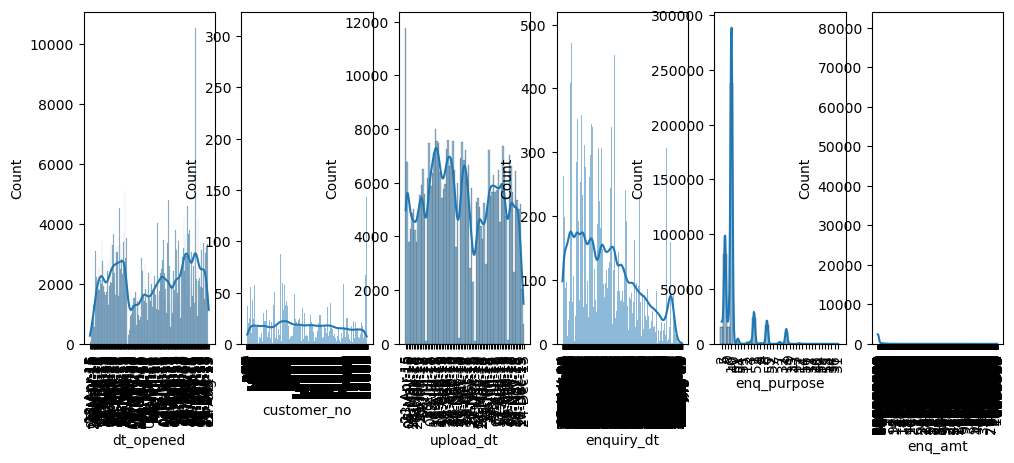

In [110]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in cust_Enquiry:
    ax=plt.subplot(5,10,plotnumber)
    sns.histplot(x=cust_Enquiry[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

# Insights from the Graph and from the Table:

# From EDA of "Cust_Enquiry" table we can say the table contain six columns, those are "dt_opened", "customer_no", "upload_dt" "enquiry_dt","enq_purpose","enq_amt". The data created on the basis of a customer enquiry.
# Among those columns dt_opened, upload_dt contain Dates which we don't need,cause dt_opened is also present in above tables.
# Others three columns contain Customers queries, those are also not require to find terget class.
# So we can Drop this table which is "Cust_Enquiry".

# Domain Analysis:

# Insights:

# Data Analysis for all tables have been completed, So now we need to merge the required tables to form our final table.

In [61]:
#In order to do Final calculations all the Dtypes should be changed into integer or float, So we need to convert datetime into integer
import pandas as pd

# List of columns with date values
date_columns = ['dt_opened']

# Iterate through date columns
for col in date_columns:
    # Convert to string and create new columns for year, month, and day
    cust_Demographics[col] =cust_Demographics[col].astype(str)
    cust_Demographics[col + '_Year'] =cust_Demographics[col].str.split('-', expand=True)[0].astype(int)
    cust_Demographics[col + '_Month'] =cust_Demographics[col].str.split('-', expand=True)[1].astype(int)
    cust_Demographics[col + '_Day'] =cust_Demographics[col].str.split('-', expand=True)[2].astype(int)

# Drop the original columns if needed
cust_Demographics.drop(date_columns, axis=1, inplace=True)

In [62]:
# Replace 'customer_no' with the actual common column(s)
common_column = 'customer_no'

# Merge tables
df_merged = pd.merge(cust_Account, cust_Demographics, on=common_column, how='inner')

In [63]:
df_merged

,customer_no,acct_type,high_credit_amt,cur_balance_amt,dt_opened_Year_x,dt_opened_Month_x,dt_opened_Day_x,upload_dt_Year,upload_dt_Month,upload_dt_Day,last_paymt_dt_Year,last_paymt_dt_Month,last_paymt_dt_Day,reporting_dt_Year,reporting_dt_Month,reporting_dt_Day,paymt_str_dt_Year,paymt_str_dt_Month,paymt_str_dt_Day,paymt_end_dt_Year,paymt_end_dt_Month,paymt_end_dt_Day,opened_dt_Year,opened_dt_Month,opened_dt_Day,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label,dt_opened_Year_y,dt_opened_Month_y,dt_opened_Day_y
0,12265.0,6.0,20900.0,0.0,2015,11,10,2015,10,20,2014,6,30,2015,9,30,2015,9,1,2014,7,1,2013,6,9,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1,2015,11,10
1,12265.0,10.0,16201.0,10390.0,2015,11,10,2015,10,20,2015,9,6,2015,10,3,2015,10,1,2012,11,1,2012,5,25,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1,2015,11,10
2,12265.0,10.0,41028.0,34420.0,2015,11,10,2015,10,20,2015,8,31,2015,9,30,2015,9,1,2012,10,1,2012,3,22,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1,2015,11,10
3,15606.0,6.0,20250.0,13500.0,2015,7,20,2015,7,9,2015,5,5,2015,5,31,2015,5,1,2015,1,1,2015,1,18,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0,2015,7,3
4,15606.0,6.0,20000.0,8000.0,2015,7,20,2015,7,9,2015,5,2,2015,5,31,2015,5,1,2015,1,1,2015,1,14,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160762,1611.0,5.0,130000.0,0.0,2015,6,11,2015,5,25,2011,7,30,2011,7,31,2011,7,1,2008,8,1,2008,4,29,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27
160763,1611.0,5.0,75000.0,0.0,2015,6,11,2015,5,25,2010,11,20,2010,11,30,2010,11,1,2008,4,1,2007,10,8,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27
160764,1611.0,10.0,29516.0,0.0,2015,6,11,2015,5,25,2012,9,5,2014,2,28,2012,9,1,2009,10,1,2007,5,30,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27
160765,1611.0,10.0,24228.0,24228.0,2015,6,11,2015,5,25,2015,4,21,2015,4,30,2015,4,1,2012,5,1,2007,5,2,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27


In [64]:
df=df_merged.copy()

In [65]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,dt_opened_Year_x,dt_opened_Month_x,dt_opened_Day_x,upload_dt_Year,upload_dt_Month,upload_dt_Day,last_paymt_dt_Year,last_paymt_dt_Month,last_paymt_dt_Day,reporting_dt_Year,reporting_dt_Month,reporting_dt_Day,paymt_str_dt_Year,paymt_str_dt_Month,paymt_str_dt_Day,paymt_end_dt_Year,paymt_end_dt_Month,paymt_end_dt_Day,opened_dt_Year,opened_dt_Month,opened_dt_Day,feature_1,feature_3,feature_7,feature_8,feature_9,feature_11,feature_12,feature_13,feature_14,feature_16,feature_17,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_48,feature_50,feature_51,feature_52,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_73,feature_74,feature_76,feature_78,feature_79,Bad_label,dt_opened_Year_y,dt_opened_Month_y,dt_opened_Day_y
0,12265.0,6.0,20900.0,0.0,2015,11,10,2015,10,20,2014,6,30,2015,9,30,2015,9,1,2014,7,1,2013,6,9,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1,2015,11,10
1,12265.0,10.0,16201.0,10390.0,2015,11,10,2015,10,20,2015,9,6,2015,10,3,2015,10,1,2012,11,1,2012,5,25,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1,2015,11,10
2,12265.0,10.0,41028.0,34420.0,2015,11,10,2015,10,20,2015,8,31,2015,9,30,2015,9,1,2012,10,1,2012,3,22,4,0,214,0,0,2,8,6,2,207,0,1,2,1,1,6,43,79,21,1,5,2,2,1,0,0,0,1,1,1,1,48,80,3,0,1,0,1,1,1,0,1,2,1,2,1,55,79,1,2,1,1,2,0,0,1,1,1,1,2015,11,10
3,15606.0,6.0,20250.0,13500.0,2015,7,20,2015,7,9,2015,5,5,2015,5,31,2015,5,1,2015,1,1,2015,1,18,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0,2015,7,3
4,15606.0,6.0,20000.0,8000.0,2015,7,20,2015,7,9,2015,5,2,2015,5,31,2015,5,1,2015,1,1,2015,1,14,7,118,11,0,0,2,15,0,1,288,0,1,1,1,4,0,26,568,49,1,3,2,1,2572,7,2,4144,12,9,4,1,32,588,3,0,2,9,476,1,5,0,1,2,1,2,10,40,1745,1,1,2572,5,2,0,0,1,1,1,0,2015,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160762,1611.0,5.0,130000.0,0.0,2015,6,11,2015,5,25,2011,7,30,2011,7,31,2011,7,1,2008,8,1,2008,4,29,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27
160763,1611.0,5.0,75000.0,0.0,2015,6,11,2015,5,25,2010,11,20,2010,11,30,2010,11,1,2008,4,1,2007,10,8,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27
160764,1611.0,10.0,29516.0,0.0,2015,6,11,2015,5,25,2012,9,5,2014,2,28,2012,9,1,2009,10,1,2007,5,30,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27
160765,1611.0,10.0,24228.0,24228.0,2015,6,11,2015,5,25,2015,4,21,2015,4,30,2015,4,1,2012,5,1,2007,5,2,5,256,324,0,0,2,11,0,1,200,0,1,1,1,1,0,43,32,1,1,3,2,1,185,9,2,1370,9,3,4,1,49,173,3,23,1,0,1,1,1,0,1,2,1,2,1,55,32,1,1,185,10,1,0,0,1,1,1,0,2015,10,27


# Checking for Co-relation:

In [66]:
# Using loop to find those columns which have more than 80% unique value.
max_unique = []
for i in df.iloc[:,:-2].columns :
    if df[i].value_counts().max() / len(df) * 100 >= 80 :
        max_unique.append(i)

In [67]:
# To see those columns name which has more than 80% unique value.
print(max_unique,end=' ')

['dt_opened_Year_x', 'upload_dt_Year', 'paymt_str_dt_Day', 'paymt_end_dt_Day', 'feature_8', 'feature_9', 'feature_11', 'feature_17', 'feature_19', 'feature_23', 'feature_31', 'feature_33', 'feature_42', 'feature_46', 'feature_55', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_73', 'feature_74', 'feature_76', 'feature_78', 'feature_79', 'Bad_label', 'dt_opened_Year_y'] 

In [68]:
ununique_columns=df[['dt_opened_Year_x', 'upload_dt_Year', 'paymt_str_dt_Day', 'paymt_end_dt_Day', 'feature_8', 'feature_9', 'feature_11', 'feature_17', 'feature_19', 
                     'feature_23', 'feature_31', 'feature_33', 'feature_42', 'feature_46', 'feature_55', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 
                     'feature_67', 'feature_73', 'feature_74', 'feature_76', 'feature_78', 'feature_79', 'dt_opened_Year_y']]

In [69]:
df.drop(columns=ununique_columns,axis=1,inplace=True)

In [70]:
df.columns

Index(['customer_no', 'acct_type', 'high_credit_amt', 'cur_balance_amt',
       'dt_opened_Month_x', 'dt_opened_Day_x', 'upload_dt_Month',
       'upload_dt_Day', 'last_paymt_dt_Year', 'last_paymt_dt_Month',
       'last_paymt_dt_Day', 'reporting_dt_Year', 'reporting_dt_Month',
       'reporting_dt_Day', 'paymt_str_dt_Year', 'paymt_str_dt_Month',
       'paymt_end_dt_Year', 'paymt_end_dt_Month', 'opened_dt_Year',
       'opened_dt_Month', 'opened_dt_Day', 'feature_1', 'feature_3',
       'feature_7', 'feature_12', 'feature_13', 'feature_14', 'feature_16',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51',
       'feature_52', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_68', 'feature_69', 'feature_71', 'fea

In [71]:
# checking correlation
# Correlation Only for Continous Data so We extract the continous data for correlation  and also drop the target
Corr_data=df[['customer_no', 'acct_type', 'high_credit_amt', 'cur_balance_amt',
       'dt_opened_Month_x', 'dt_opened_Day_x', 'upload_dt_Month',
       'upload_dt_Day', 'last_paymt_dt_Year', 'last_paymt_dt_Month',
       'last_paymt_dt_Day', 'reporting_dt_Year', 'reporting_dt_Month',
       'reporting_dt_Day', 'paymt_str_dt_Year', 'paymt_str_dt_Month',
       'paymt_end_dt_Year', 'paymt_end_dt_Month', 'opened_dt_Year',
       'opened_dt_Month', 'opened_dt_Day', 'feature_1', 'feature_3',
       'feature_7', 'feature_12', 'feature_13', 'feature_14', 'feature_16',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51',
       'feature_52', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_68', 'feature_69', 'feature_71', 'feature_72', 'Bad_label',
       'dt_opened_Month_y', 'dt_opened_Day_y']]

In [72]:
Corr_data.corr()

,customer_no,acct_type,high_credit_amt,cur_balance_amt,dt_opened_Month_x,dt_opened_Day_x,upload_dt_Month,upload_dt_Day,last_paymt_dt_Year,last_paymt_dt_Month,last_paymt_dt_Day,reporting_dt_Year,reporting_dt_Month,reporting_dt_Day,paymt_str_dt_Year,paymt_str_dt_Month,paymt_end_dt_Year,paymt_end_dt_Month,opened_dt_Year,opened_dt_Month,opened_dt_Day,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,dt_opened_Month_y,dt_opened_Day_y
customer_no,1.000000,0.009282,-0.011282,-0.003819,0.527192,0.107529,0.511768,-0.018969,0.015536,0.188369,0.007514,0.016435,0.252254,0.000665,0.029312,0.251390,0.044103,0.049973,0.029673,-0.008349,-0.006219,0.273617,0.010557,0.006026,0.240540,-0.058416,0.001633,0.005966,0.010709,0.097725,-0.034619,-0.035678,0.087273,0.023031,0.050110,-0.032224,0.030225,0.022054,-0.043655,0.036427,0.029094,0.040021,0.025923,-0.031501,0.092141,0.021288,0.043194,0.035890,0.020527,0.037424,0.021574,-0.034133,0.046464,-0.032224,0.030225,0.036010,0.011893,0.001468,-0.188834,0.058172
acct_type,0.009282,1.000000,-0.081591,-0.087409,0.003704,0.001468,0.005204,-0.002301,0.008822,0.011626,0.111452,0.048983,-0.016377,-0.165099,0.028002,0.024400,0.004108,0.008947,-0.045932,0.001914,-0.035798,0.006711,-0.002800,0.003373,0.007575,-0.006650,-0.009284,0.003243,-0.003224,0.004827,0.000755,-0.003712,0.003343,0.000462,0.002124,0.000596,0.002797,-0.001402,-0.001054,-0.001726,0.000522,0.001199,-0.001530,-0.004313,0.003397,-0.001202,0.000877,-0.001364,0.002756,-0.000131,-0.000715,-0.001623,0.000303,0.000596,0.002797,0.000407,0.004140,-0.005256,-0.001119,0.002510
high_credit_amt,-0.011282,-0.081591,1.000000,0.768312,-0.002112,0.003566,0.000567,0.000850,0.027743,-0.005239,0.007471,0.016318,-0.021700,0.061452,0.019382,-0.011127,0.011917,0.001486,0.018734,-0.000071,0.029993,-0.004112,0.001471,-0.001047,-0.003346,0.004090,0.008980,-0.001607,-0.001888,0.004873,-0.006886,0.006226,-0.002504,0.004685,0.007090,0.000512,0.001767,0.001943,-0.004303,-0.000759,0.000476,0.007300,-0.000277,0.008064,-0.003329,0.001435,0.002632,0.002297,0.002820,-0.001820,-0.003468,0.000359,-0.005281,0.000512,0.001767,-0.001499,-0.007918,0.014975,-0.005464,0.003871
cur_balance_amt,-0.003819,-0.087409,0.768312,1.000000,0.000734,0.001216,0.002316,-0.000022,0.067139,-0.005022,-0.004428,0.053269,-0.015926,0.053747,0.060116,-0.010165,0.064778,0.000492,0.063916,-0.002766,0.028434,-0.002584,0.002123,-0.000814,-0.002161,0.003724,0.007046,-0.001455,-0.003064,0.001292,-0.004639,0.006439,-0.001655,0.001934,0.003974,0.000017,0.000445,0.000623,-0.002539,-0.001696,-0.000590,0.004865,-0.000761,0.006138,-0.002463,0.002280,0.000004,-0.000877,0.001140,-0.003373,-0.003271,0.000523,-0.003740,0.000017,0.000445,-0.001876,-0.002719,0.007601,-0.002873,0.003375
dt_opened_Month_x,0.527192,0.003704,-0.002112,0.000734,1.000000,-0.010273,0.937638,0.007471,0.047285,0.346879,-0.009809,0.041056,0.463851,0.028179,0.069533,0.457798,0.105016,0.090218,0.082440,-0.009669,0.002138,-0.144278,0.014458,-0.015508,-0.118923,0.034527,0.062783,-0.015239,0.004454,-0.087131,-0.031656,0.013191,-0.038474,-0.021169,-0.059692,0.009956,-0.030790,0.000165,0.013464,-0.000426,-0.012596,-0.022237,-0.009957,0.012889,-0.038120,-0.018328,-0.024742,-0.012879,-0.018568,-0.003517,-0.008618,0.002226,-0.031816,0.009956,-0.030790,-0.006146,0.006461,0.009896,0.082809,0.057676
dt_opened_Day_x,0.107529,0.001468,0.003566,0.001216,-0.010273,1.000000,0.143795,-0.110910,0.002153,0.049499,-0.005972,0.002591,0.063517,0.005854,0.007054,0.062680,0.009857,0.014675,0.005878,-0.000384,-0.001850,0.013504,0.005023,-0.003209,0.013231,0.045916,0.039286,0.013365,0.005508,0.017400,-0.007812,0.006223,-0.008076,0.01

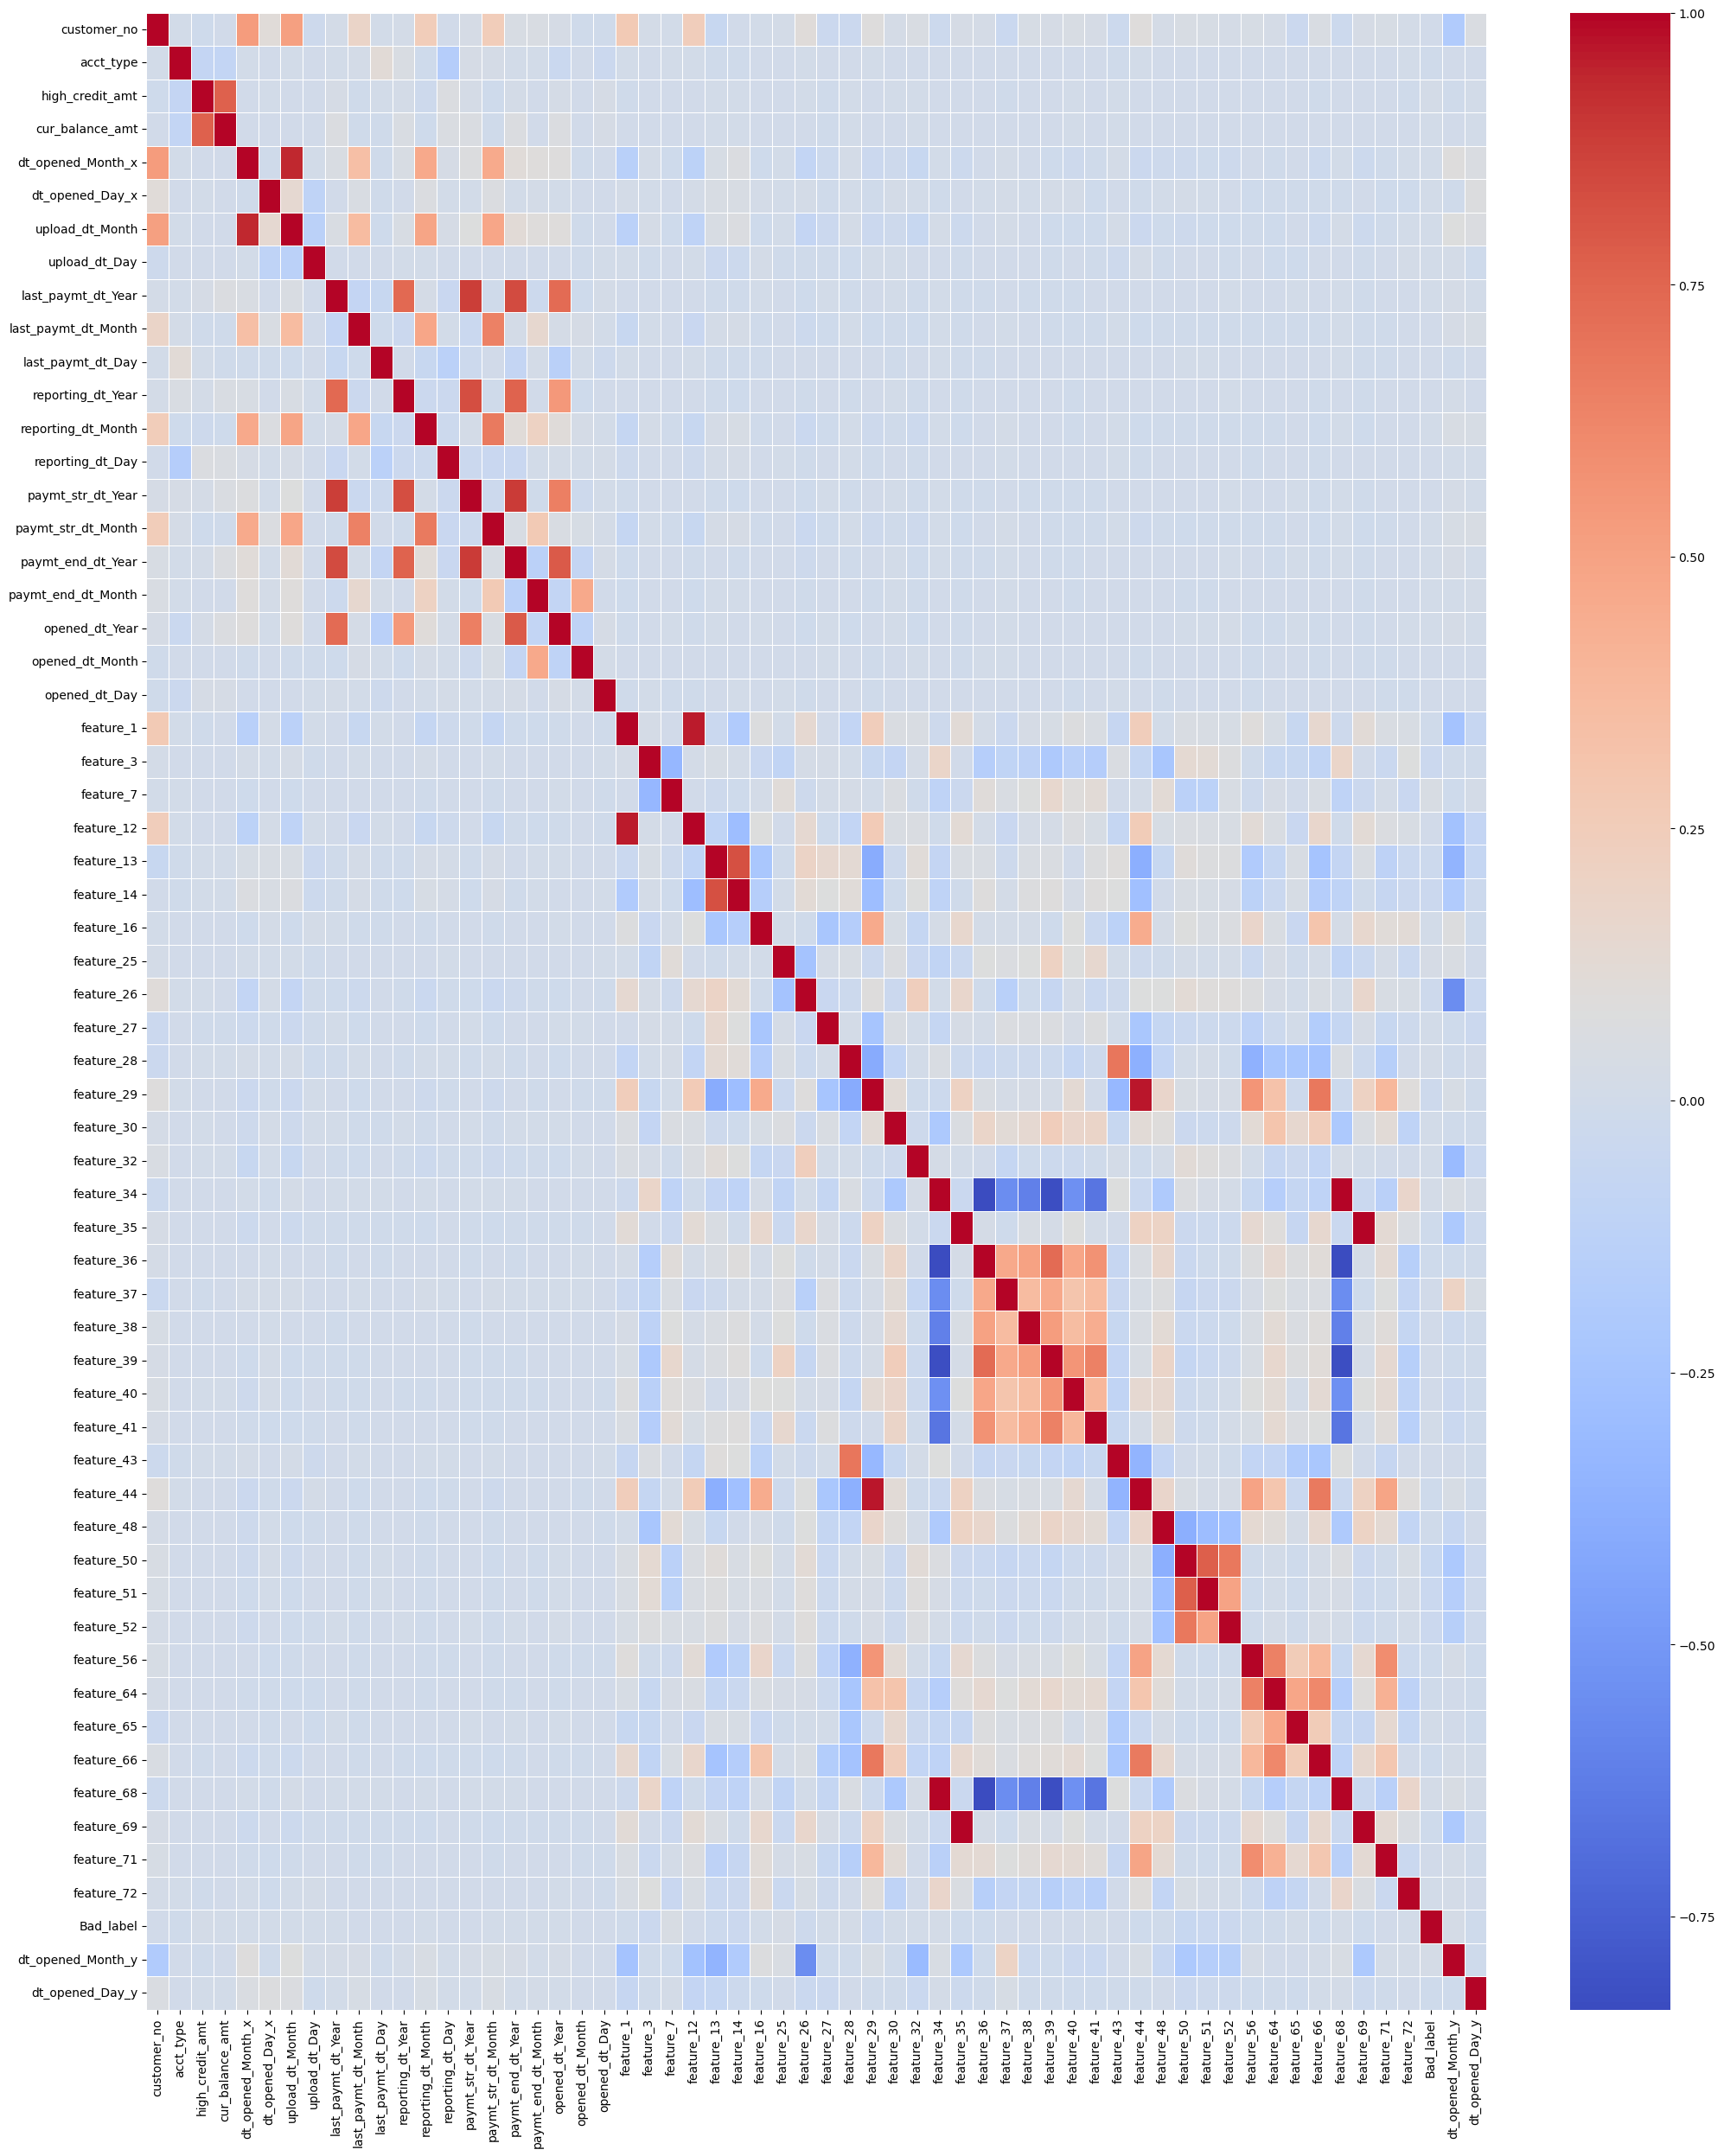

In [73]:
# Calculate the correlation matrix
correlation_matrix = Corr_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25,30))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

# Model Creation:

In [74]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,dt_opened_Month_x,dt_opened_Day_x,upload_dt_Month,upload_dt_Day,last_paymt_dt_Year,last_paymt_dt_Month,last_paymt_dt_Day,reporting_dt_Year,reporting_dt_Month,reporting_dt_Day,paymt_str_dt_Year,paymt_str_dt_Month,paymt_end_dt_Year,paymt_end_dt_Month,opened_dt_Year,opened_dt_Month,opened_dt_Day,feature_1,feature_3,feature_7,feature_12,feature_13,feature_14,feature_16,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_43,feature_44,feature_48,feature_50,feature_51,feature_52,feature_56,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,dt_opened_Month_y,dt_opened_Day_y
0,12265.0,6.0,20900.0,0.0,11,10,10,20,2014,6,30,2015,9,30,2015,9,2014,7,2013,6,9,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,11,10
1,12265.0,10.0,16201.0,10390.0,11,10,10,20,2015,9,6,2015,10,3,2015,10,2012,11,2012,5,25,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,11,10
2,12265.0,10.0,41028.0,34420.0,11,10,10,20,2015,8,31,2015,9,30,2015,9,2012,10,2012,3,22,4,0,214,8,6,2,207,1,1,6,43,79,21,5,2,1,0,0,0,1,1,1,48,80,0,1,0,1,1,1,55,79,2,1,1,2,1,11,10
3,15606.0,6.0,20250.0,13500.0,7,20,7,9,2015,5,5,2015,5,31,2015,5,2015,1,2015,1,18,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,0,7,3
4,15606.0,6.0,20000.0,8000.0,7,20,7,9,2015,5,2,2015,5,31,2015,5,2015,1,2015,1,14,7,118,11,15,0,1,288,1,4,0,26,568,49,3,1,2572,7,2,4144,12,9,4,32,588,0,2,9,476,5,10,40,1745,1,2572,5,2,0,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160762,1611.0,5.0,130000.0,0.0,6,11,5,25,2011,7,30,2011,7,31,2011,7,2008,8,2008,4,29,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,0,10,27
160763,1611.0,5.0,75000.0,0.0,6,11,5,25,2010,11,20,2010,11,30,2010,11,2008,4,2007,10,8,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,0,10,27
160764,1611.0,10.0,29516.0,0.0,6,11,5,25,2012,9,5,2014,2,28,2012,9,2009,10,2007,5,30,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,0,10,27
160765,1611.0,10.0,24228.0,24228.0,6,11,5,25,2015,4,21,2015,4,30,2015,4,2012,5,2007,5,2,5,256,324,11,0,1,200,1,1,0,43,32,1,3,1,185,9,2,1370,9,3,4,49,173,23,1,0,1,1,1,55,32,1,185,10,1,0,10,27


In [75]:
x=df.drop('Bad_label',axis=1)
y=df[['Bad_label']]

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

# Logistic Regression:

In [77]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [78]:
lr.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_predict=lr.predict(x_test)

# Model Evaluation:

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,mean_squared_error,mean_absolute_error,accuracy_score

In [81]:
lr_acc_sc=accuracy_score(y_test,y_predict)
print(lr_acc_sc)

0.9599842424996372


In [82]:
lr_cls_rep=classification_report(y_test,y_predict)
print(lr_cls_rep)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     46302
           1       0.00      0.00      0.00      1929

    accuracy                           0.96     48231
   macro avg       0.48      0.50      0.49     48231
weighted avg       0.92      0.96      0.94     48231



# Plotting ROC Curve:

In [83]:
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

0.5310830831613551


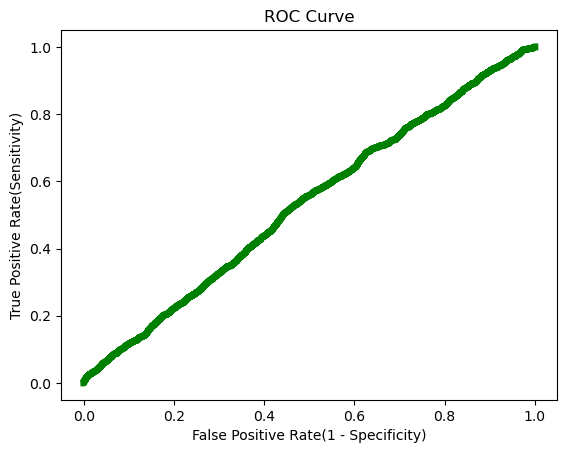

In [84]:
y_predict1 =lr.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

# Decision Tree:

In [93]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()

In [94]:
DC.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
y_predict=DC.predict(x_test)

# Model Evaluation:

In [96]:
dt_acc_sc=accuracy_score(y_test,y_predict)
print(dt_acc_sc)

0.9950032137007319


In [97]:
dt_cls_rep=classification_report(y_test,y_predict)
print(dt_cls_rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46302
           1       0.93      0.95      0.94      1929

    accuracy                           1.00     48231
   macro avg       0.96      0.97      0.97     48231
weighted avg       1.00      1.00      1.00     48231



# Hyperparametric Tunning:

In [94]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.6s
[

In [98]:
dtcls=DecisionTreeClassifier(max_depth= 10,max_features='log2',min_samples_leaf=1,min_samples_split=5)

In [99]:
dtcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_split=5)

In [100]:
y_predict=dtcls.predict(x_test)

# Model Evaluation:

In [101]:
dt1_acc_sc=accuracy_score(y_predict,y_test)
print(dt1_acc_sc)

0.9641102195683274


In [102]:
dt1_cls_rep=classification_report(y_test,y_predict)
print(dt1_cls_rep)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     46302
           1       0.79      0.14      0.24      1929

    accuracy                           0.96     48231
   macro avg       0.88      0.57      0.61     48231
weighted avg       0.96      0.96      0.95     48231



# Gradient Boosting:

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [104]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [105]:
y_predict=GBC.predict(x_test)

# Model Evaluation:

In [106]:
gb_acc_sc=accuracy_score(y_test,y_predict)
print(gb_acc_sc)

0.961062387261305


In [107]:
gb_cls_rep=classification_report(y_test,y_predict)
print(gb_cls_rep)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     46302
           1       1.00      0.03      0.05      1929

    accuracy                           0.96     48231
   macro avg       0.98      0.51      0.52     48231
weighted avg       0.96      0.96      0.94     48231



# KNN Classifier:

In [108]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [109]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [110]:
y_predict=KNN.predict(x_test)

# Model Evaluation:

In [111]:
kn_acc_sc=accuracy_score(y_test,y_predict)
print(kn_acc_sc)

0.9587609628662064


In [112]:
kn_cls_rep=classification_report(y_test,y_predict)
print(kn_cls_rep)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     46302
           1       0.16      0.01      0.01      1929

    accuracy                           0.96     48231
   macro avg       0.56      0.50      0.50     48231
weighted avg       0.93      0.96      0.94     48231



0.5551538943092724


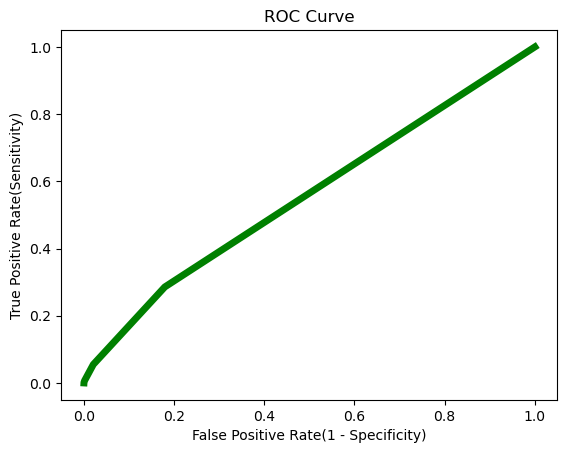

In [113]:
y_predict1 =KNN.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

# SVM: 

In [85]:
from sklearn.svm import SVC
sv=SVC()

In [86]:
sv.fit(x_train,y_train)

SVC()

In [87]:
y_predict=sv.predict(x_test)

# Model Evaluation:

In [88]:
sv_acc_sc=accuracy_score(y_test,y_predict)
print(sv_acc_sc)

0.9600049760527462


In [89]:
sv_cls_rep=classification_report(y_test,y_predict)
print(sv_cls_rep)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     46302
           1       0.00      0.00      0.00      1929

    accuracy                           0.96     48231
   macro avg       0.48      0.50      0.49     48231
weighted avg       0.92      0.96      0.94     48231



# Cross Validation:

In [90]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(sv, x, y, cv=5, scoring='r2')

print("Cross-validation R2 scores:", scores)
print("Mean R2 Score:", scores.mean())
print("Standard Deviation of R2 Score:", scores.std())

Cross-validation R2 scores: [-0.04363314 -0.04284371 -0.0428451  -0.04205566 -0.04281127]
Mean R2 Score: -0.04283777548573413
Standard Deviation of R2 Score: 0.0004990196307282752


# Hyperparametric Tunning:

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.1,5,10,50,60,70],"gamma":[1,1.0,0.01,0.001,0.001,],'random_state':list(range(1,20))}
model=SVC()
grid=GridSearchCV(model,param_grid,verbose=2,scoring='f1',cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END ....................C=0.1, gamma=1, random_state=1; total time=131.5min


# Random Forest Classifier:

In [126]:
from sklearn.ensemble import RandomForestClassifier
RVC=RandomForestClassifier()

In [127]:
RVC.fit(x_train,y_train)

RandomForestClassifier()

In [128]:
y_predict=RVC.predict(x_test)

# Model Evaluation:

In [129]:
rf_acc_sc=accuracy_score(y_predict,y_test)
print(rf_acc_sc)

0.9950861479131679


In [130]:
rf_cls_rep=classification_report(y_test,y_predict)
print(rf_cls_rep)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     46302
           1       1.00      0.88      0.93      1929

    accuracy                           1.00     48231
   macro avg       1.00      0.94      0.97     48231
weighted avg       1.00      1.00      0.99     48231

